In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle

In [2]:
# Cambia las rutas si hace falta
df_test  = pd.read_csv(r"test_genetic_disorders.csv")
data = pd.read_csv(r"train_genetic_disorders.csv")

In [3]:
data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [5]:
data.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.describe(include="object")

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,21011,21011,20724,18317,21011,21011,11771,21011,16151,21011,...,18998,18959,18964,18921,19007,18945,18959,18977,18962,18943
unique,21011,2,2,2,2,2480,6051,15777,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x883d,Yes,No,Yes,No,James,Smith,Clardie,Not applicable,-,...,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,12509,12508,10125,11887,394,151,6,8011,10386,...,9625,9500,4807,4797,9555,9605,9509,4855,9686,4893


In [7]:
data.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [8]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Patient Id                                           4.854413
Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Patient First Name                                   4.854413
Family Name                                         46.696554
Father's name                                        4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Institute Name                                      26.862292
Location of Institute                                4.854413
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Ra

In [9]:
data['Genetic Disorder'].value_counts()

Genetic Disorder
Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: count, dtype: int64

In [10]:
data['Disorder Subclass'].value_counts()

Disorder Subclass
Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Hemochromatosis                        1291
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: count, dtype: int64

In [11]:
for col in data.select_dtypes(include=["object"]):
    print(f"{data[col].value_counts()}\n")

Patient Id
PID0x883d    1
PID0x6418    1
PID0x25d5    1
PID0x160a    1
PID0x51d0    1
            ..
PID0x4f8f    1
PID0x28de    1
PID0x44fe    1
PID0x1bf7    1
PID0x4ac8    1
Name: count, Length: 21011, dtype: int64

Genes in mother's side
Yes    12509
No      8502
Name: count, dtype: int64

Inherited from father
No     12508
Yes     8216
Name: count, dtype: int64

Maternal gene
Yes    10125
No      8192
Name: count, dtype: int64

Paternal gene
No     11887
Yes     9124
Name: count, dtype: int64

Patient First Name
James         394
John          356
Robert        339
Mary          309
Michael       308
             ... 
Retha           1
Hugo            1
Earnestine      1
Aurelio         1
Queen           1
Name: count, Length: 2480, dtype: int64

Family Name
Smith        151
Williams     104
Johnson       96
Brown         83
Jones         77
            ... 
Hasan          1
Homza          1
Harness        1
Stutzman       1
Hoelscher      1
Name: count, Length: 6051, dtype: int64


In [12]:
numerical_cols = data.select_dtypes(include=["number"]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

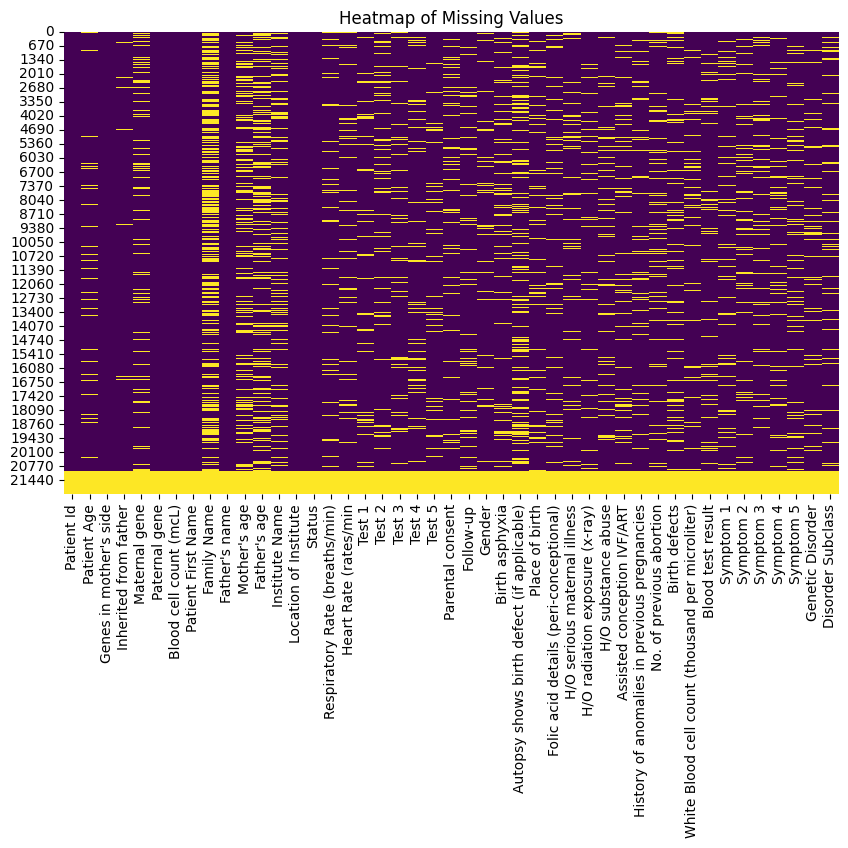

In [13]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [14]:
# Drop rows where all values are NaN
data = data.dropna(how='all')
columns_to_drop = [
        "Patient Id",
        "Family Name",
        "Institute Name",
        "Patient First Name",
        "Father's name",
        "Location of Institute",
        "Parental consent",
        "Test 1",
        "Test 2",
        "Test 3",
        "Test 4",
        "Test 5",
        "Mother's age",
        "Father's age"
    ]
data = data.drop(columns = columns_to_drop, errors='ignore')
cat_columns = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']

for col in cat_columns:
    data[col] = data[col].astype('object')

disorder_mapping = {
        "Leber's hereditary optic neuropathy": "Mitochondrial genetic inheritance disorders",
        "Leigh syndrome": "Mitochondrial genetic inheritance disorders",
        "Mitochondrial myopathy": "Mitochondrial genetic inheritance disorders",
        "Alzheimer's": "Multifactorial genetic inheritance disorders",
        "Cancer": "Multifactorial genetic inheritance disorders",
        "Diabetes": "Multifactorial genetic inheritance disorders",
        "Cystic fibrosis": "Single-gene inheritance diseases",
        "Hemochromatosis": "Single-gene inheritance diseases",
        "Tay-Sachs": "Single-gene inheritance diseases",
    }
def fill_genetic_disorder(row):
        if pd.isnull(row["Genetic Disorder"]) and row["Disorder Subclass"] in disorder_mapping:
            return disorder_mapping[row["Disorder Subclass"]]
        else:
            return row["Genetic Disorder"]

data["Genetic Disorder"] = data.apply(fill_genetic_disorder, axis=1)

for subclass in data['Disorder Subclass'].dropna().unique():
        mode_genetic_disorder = data[data['Disorder Subclass'] == subclass]['Genetic Disorder'].mode()
        if not mode_genetic_disorder.empty:
            data.loc[
                (data['Disorder Subclass'] == subclass) & (data['Genetic Disorder'].isnull()),
                'Genetic Disorder'
            ] = mode_genetic_disorder[0]

        # Fill missing 'Disorder Subclass' based on 'Genetic Disorder'
for disorder in data['Genetic Disorder'].dropna().unique():
    mode_disorder_subclass = data[data['Genetic Disorder'] == disorder]['Disorder Subclass'].mode()
    if not mode_disorder_subclass.empty:
        data.loc[
            (data['Genetic Disorder'] == disorder) & (data['Disorder Subclass'].isnull()),
            'Disorder Subclass'
        ] = mode_disorder_subclass[0]

data = data.dropna(subset=["Genetic Disorder", "Disorder Subclass"])

grouped = data.groupby(["Genetic Disorder", "Disorder Subclass"])

def fill_nulls(group):
    for column in group.columns:
        if group[column].isnull().any():
            if group[column].dtype == 'object':
                mode_value = group[column].mode()
                if not mode_value.empty:
                    group[column] = group[column].fillna(mode_value[0])
            else:
                median_value = group[column].median()
                group[column] = group[column].fillna(median_value)
    return group


data_filled = grouped.apply(fill_nulls).reset_index(drop=True)

# Define values to replace with 'Missing'
missing_values = ["No record", "Not available", "Not applicable", "-", "Ambiguous"]

# Replace specified values with 'Missing' in categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = data[col].replace(missing_values, 'Missing')
data_filled['Symptom Count'] = data_filled[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']].sum(axis=1)
data_filled.drop(columns=['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'], inplace=True)
data_filled['Total Blood Cell Count'] = data_filled['Blood cell count (mcL)'] + data_filled['White Blood cell count (thousand per microliter)']
data_filled.drop(columns=['Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)'], inplace=True)
data_filled['Combined_disorder'] = data_filled.apply(lambda row: f"{row['Genetic Disorder'].replace(' ', '_')}_"f"{row['Disorder Subclass'].replace(' ', '_')}",
axis=1)

data = data_filled.copy()

C:\Users\rafael\AppData\Local\Temp\ipykernel_26584\2021633504.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
C:\Users\rafael\AppData\Local\Temp\ipykernel_26584\2021633504.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[column] = group[column].fillna(mode_value[0])
C:\Users\rafael\AppData\Local\Temp\ipykernel_26584\2021633504.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=F

In [15]:
data.isnull().sum().head()

Patient Age               0
Genes in mother's side    0
Inherited from father     0
Maternal gene             0
Paternal gene             0
dtype: int64

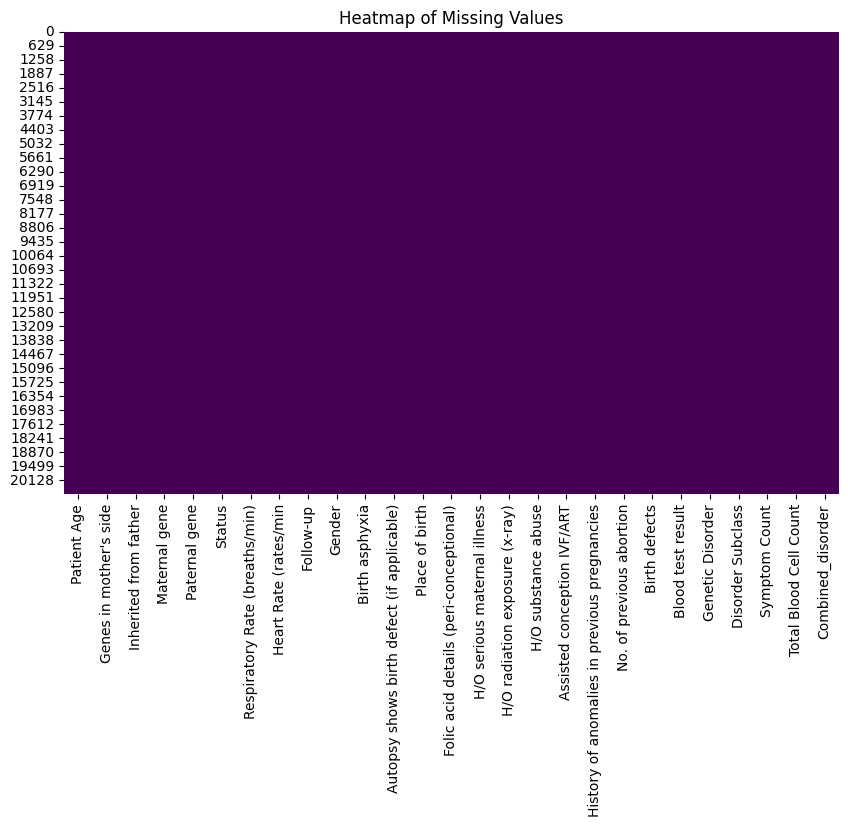

In [16]:
# Create a heatmap to visualize null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [17]:
numerical_cols = data.select_dtypes(include=["number"]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

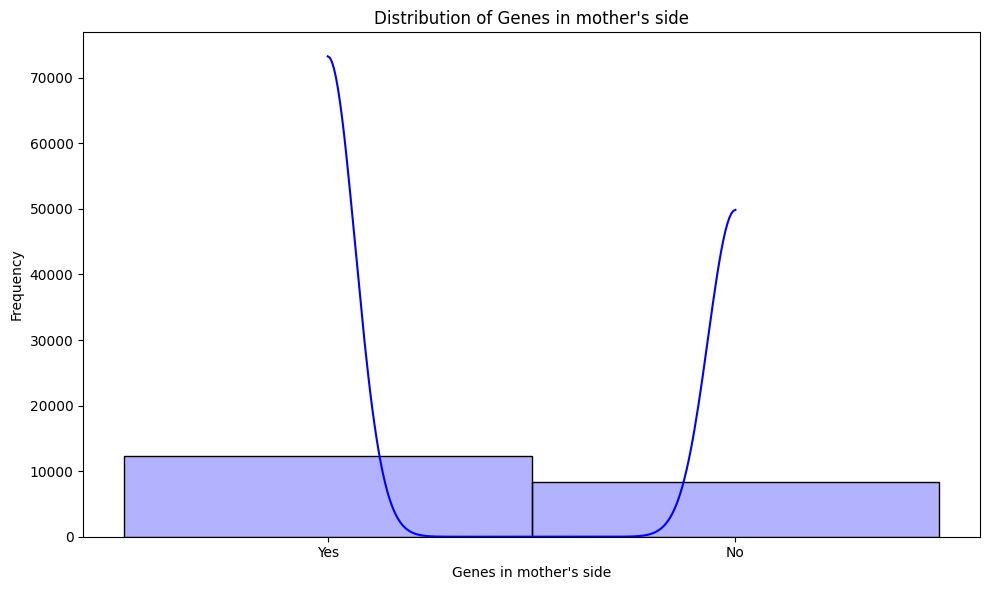

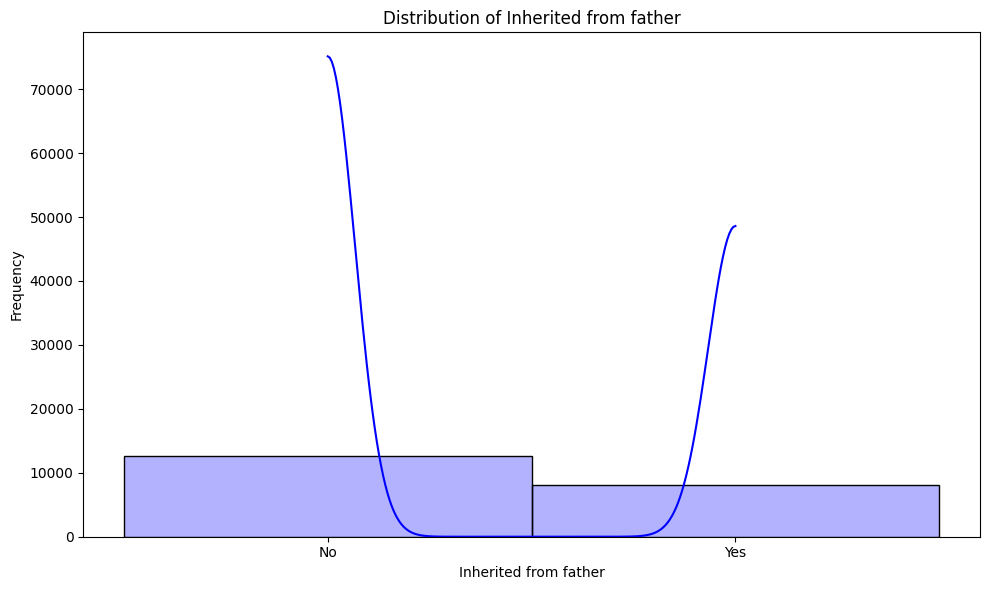

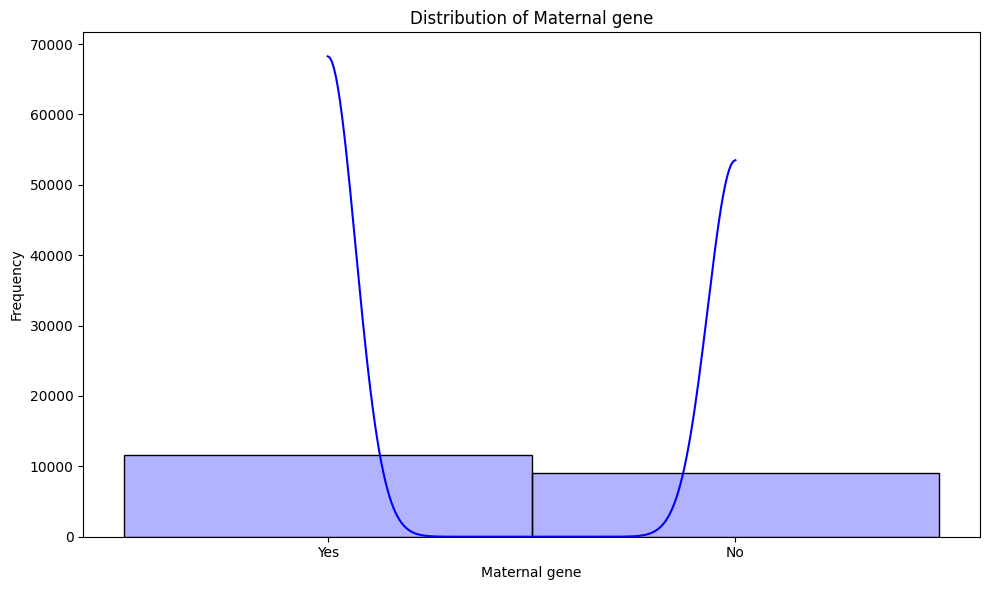

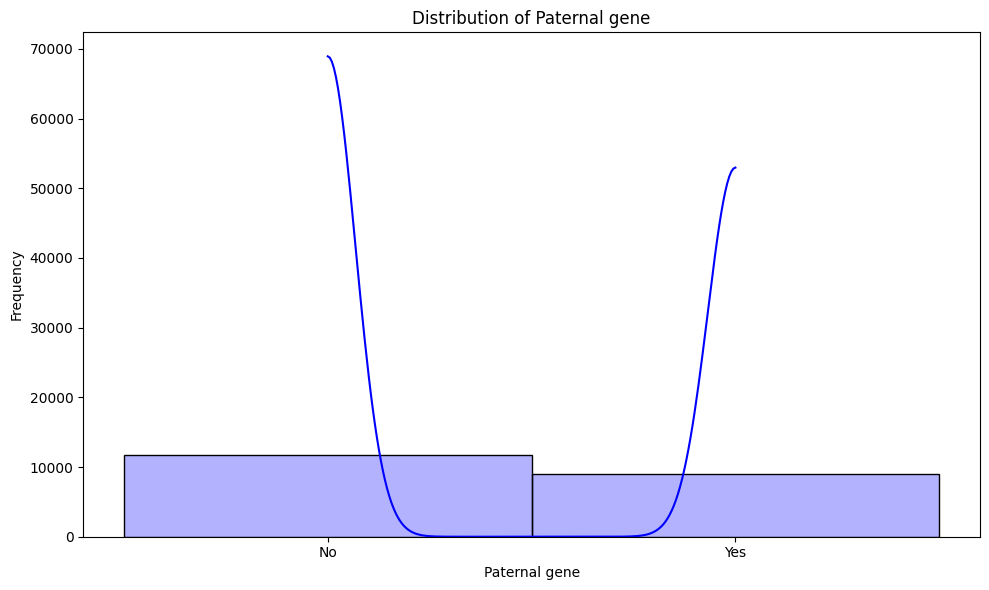

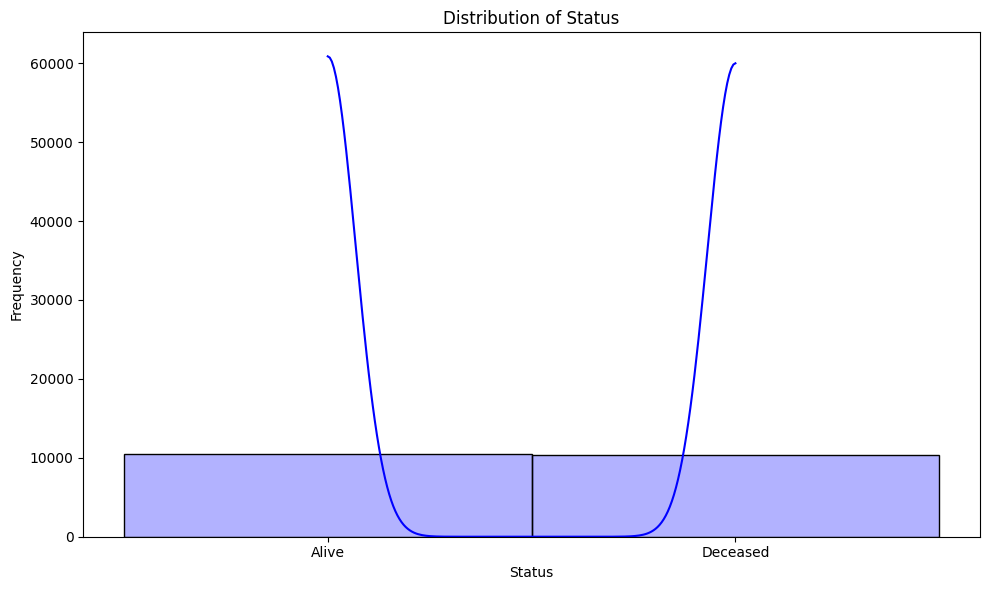

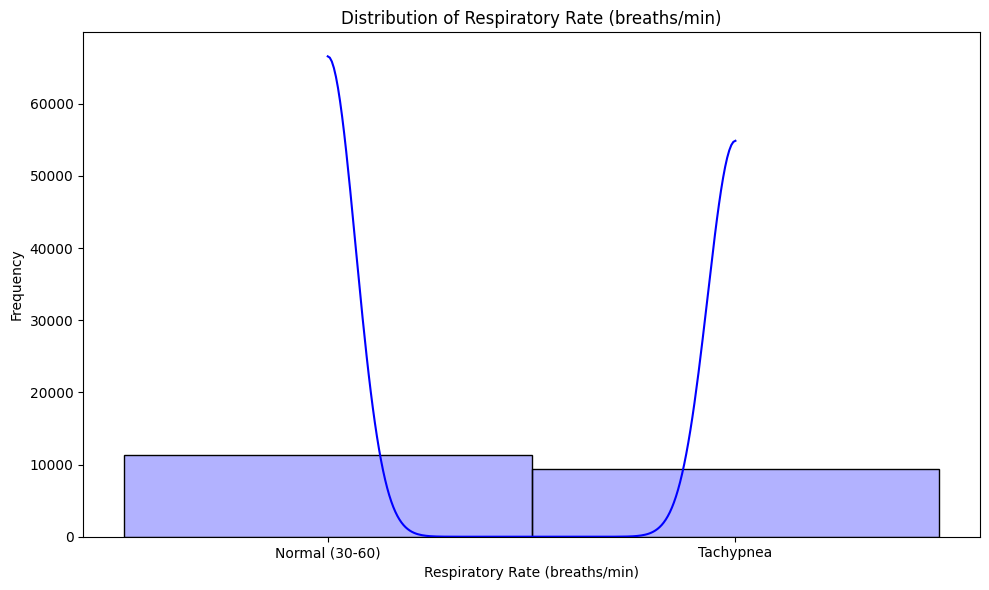

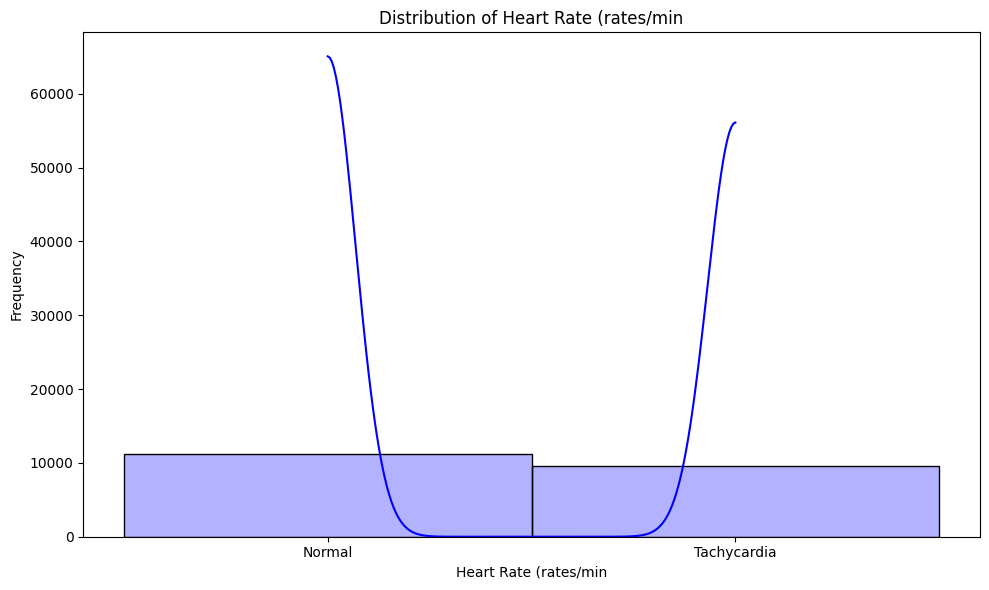

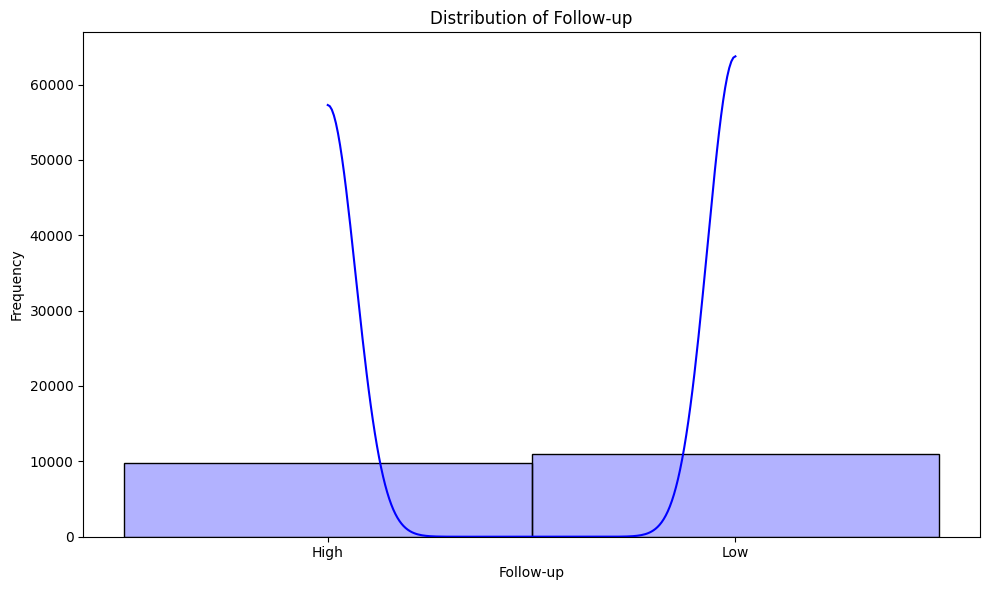

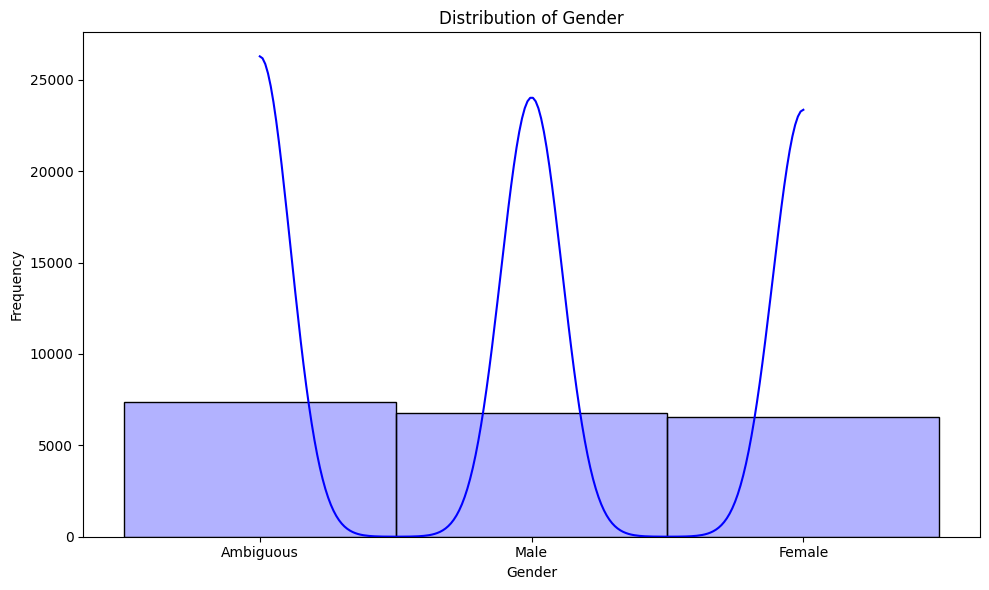

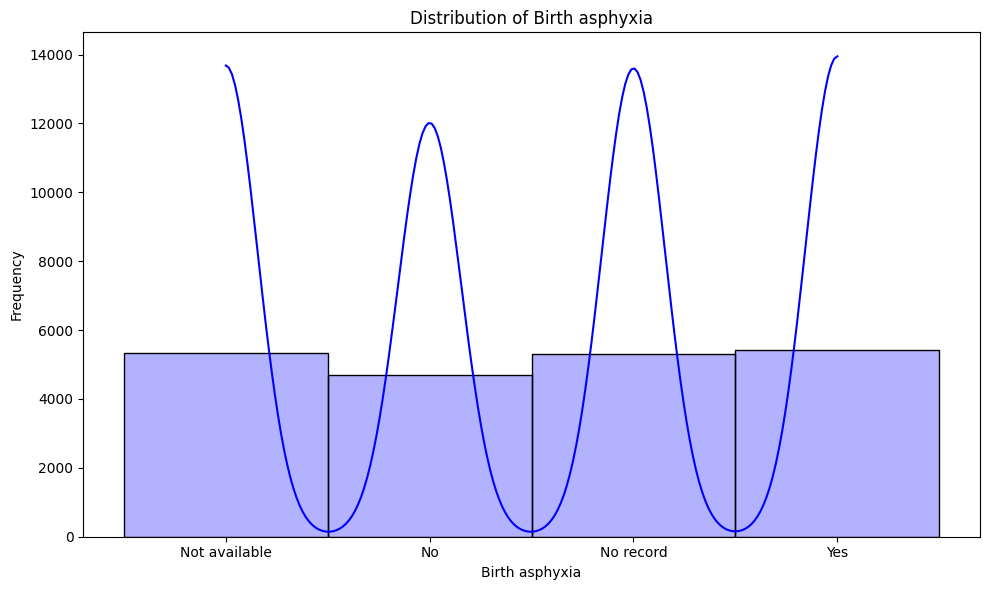

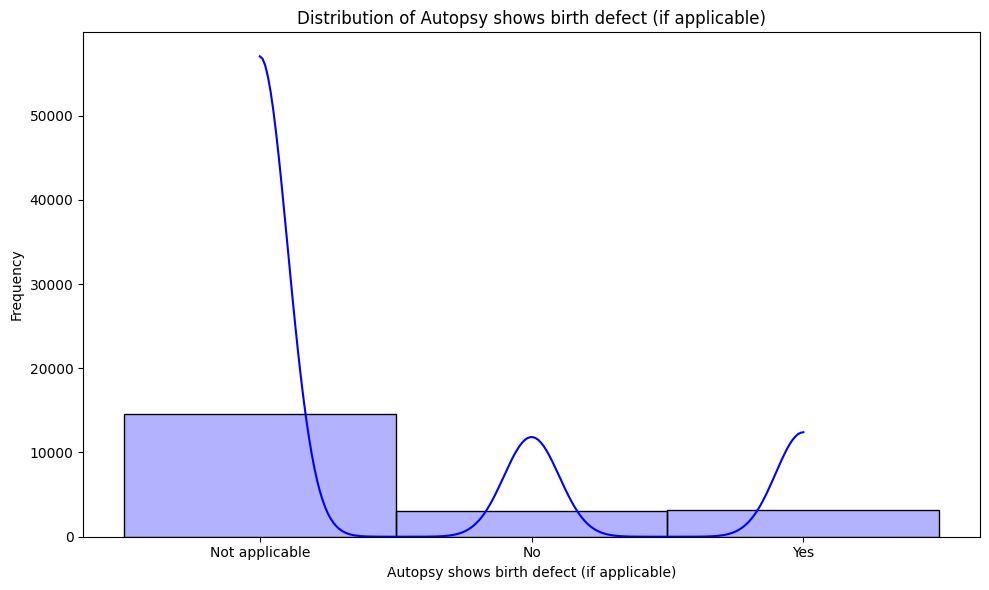

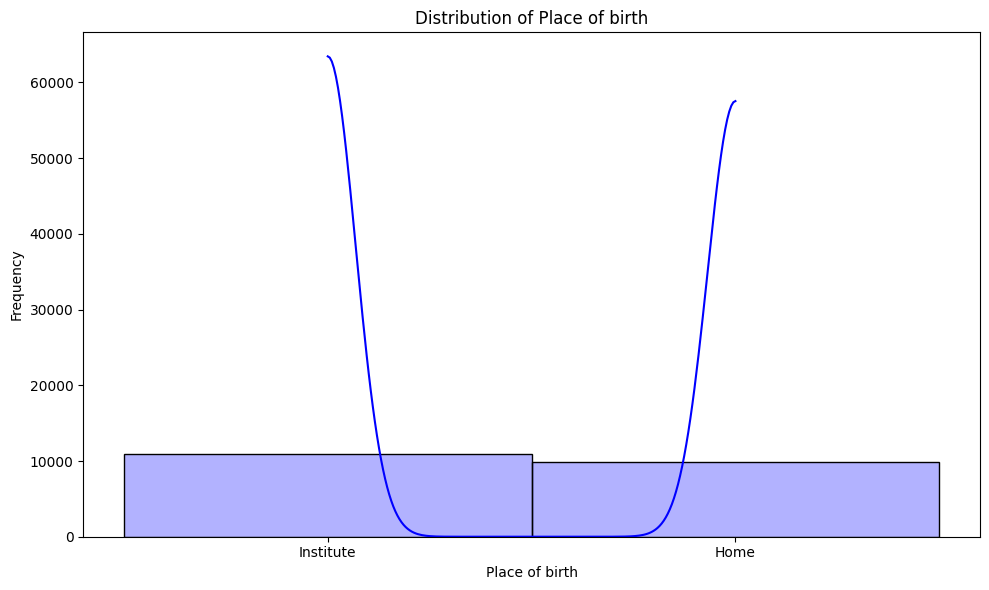

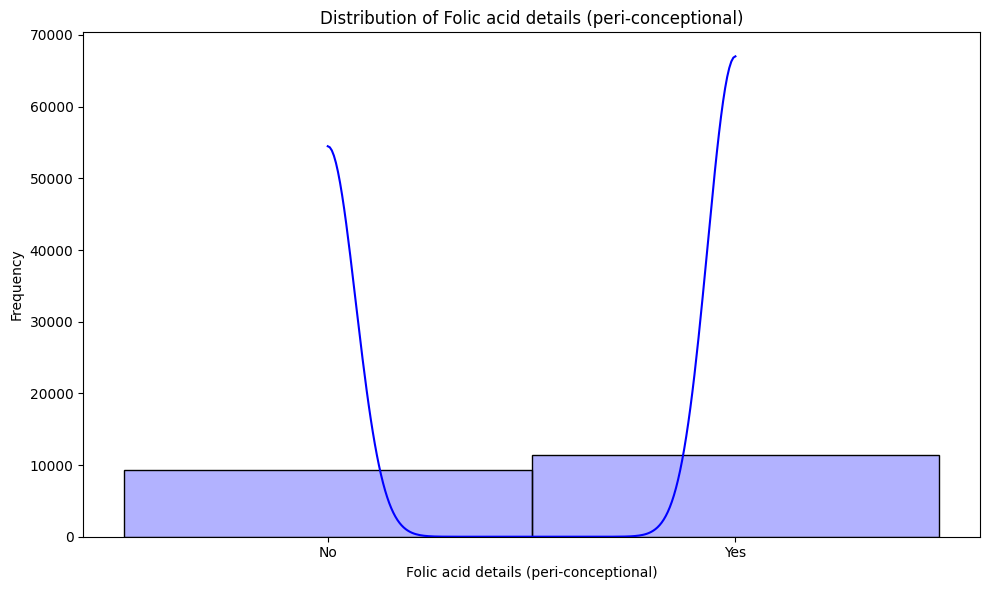

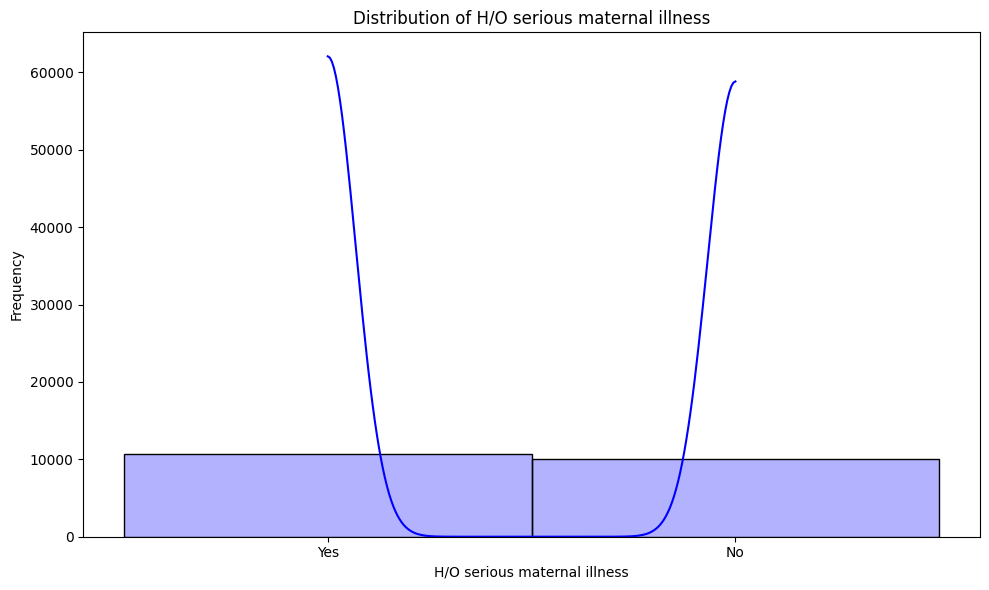

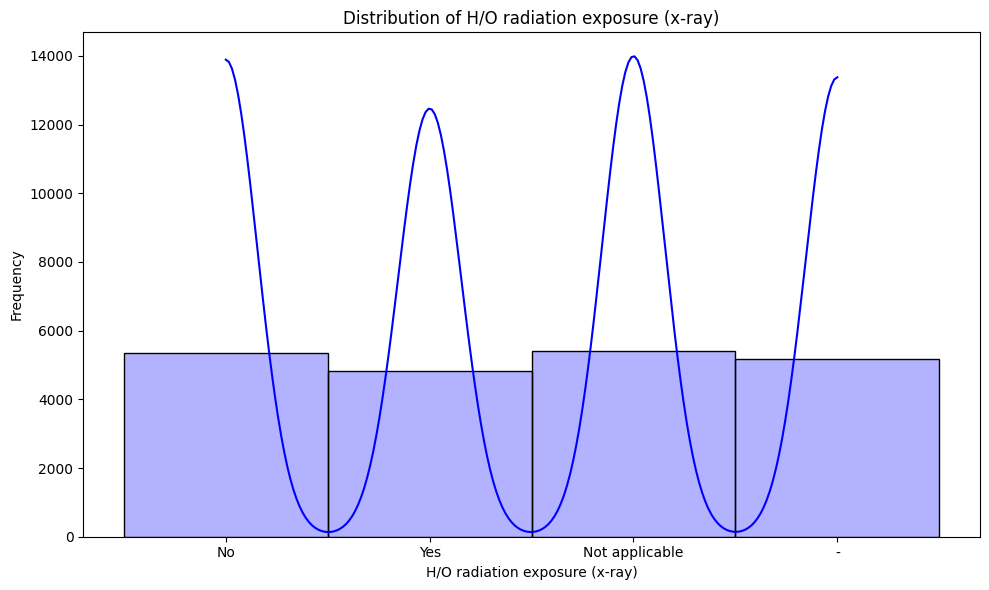

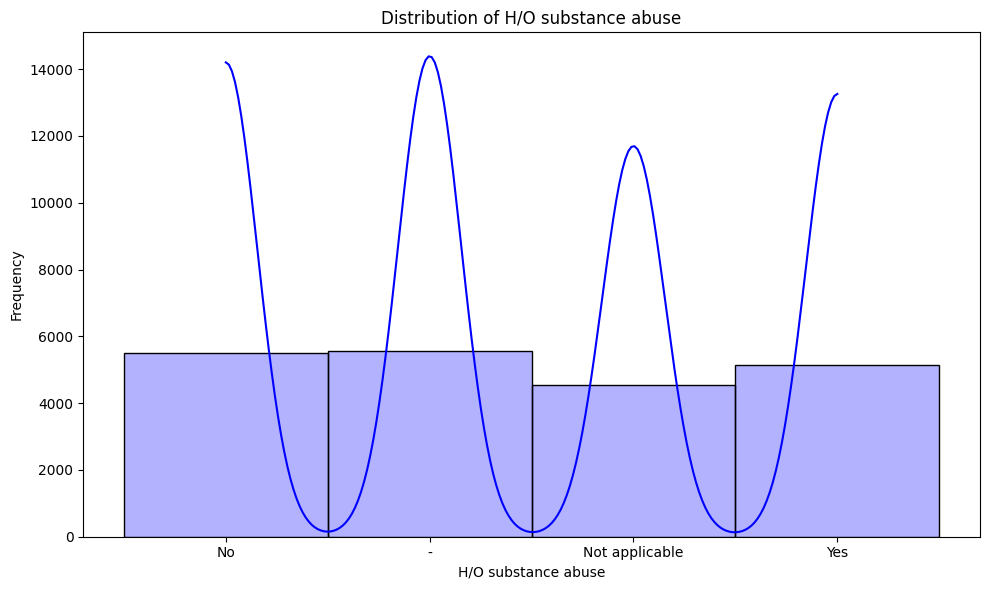

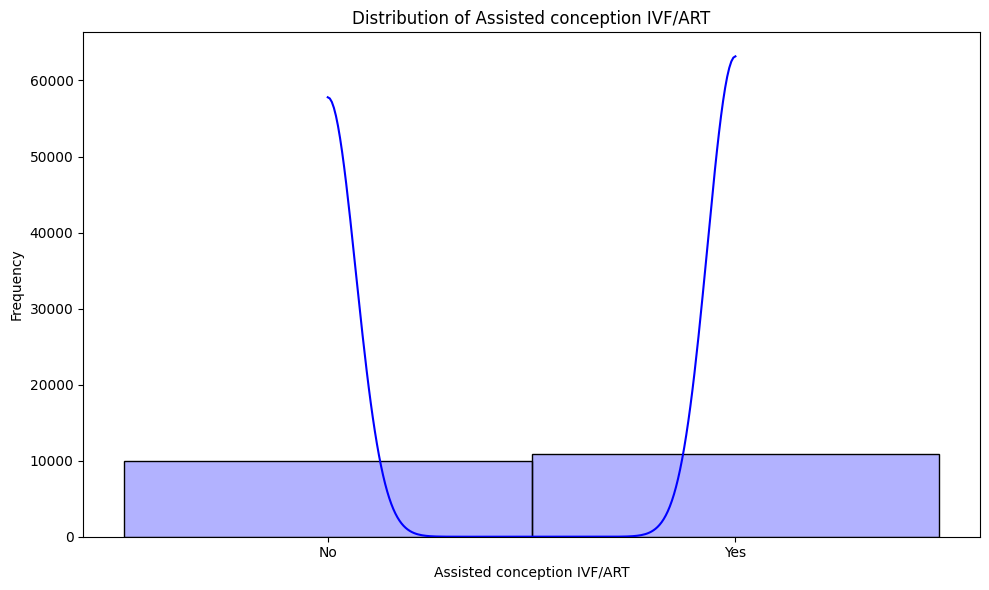

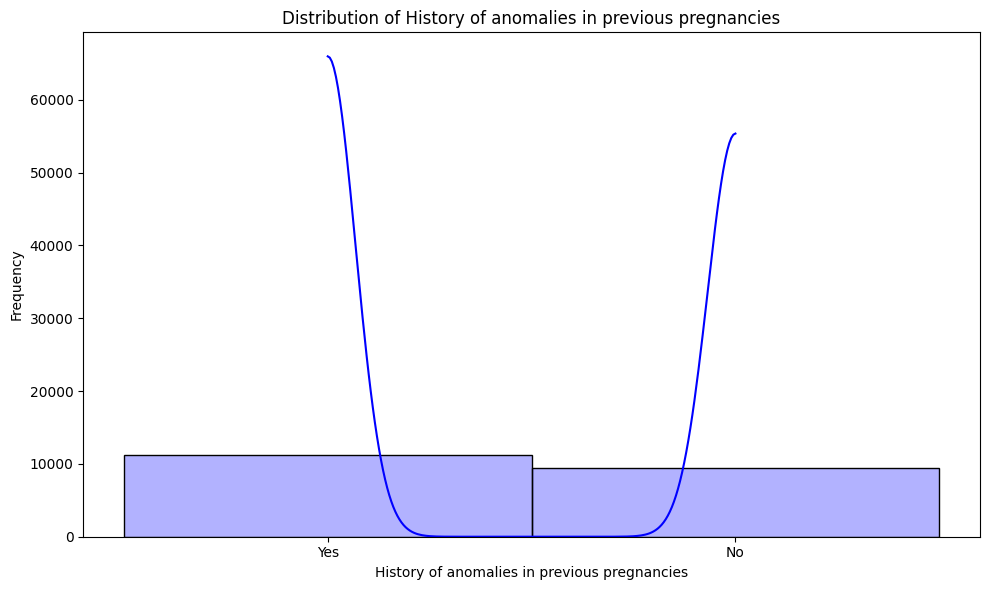

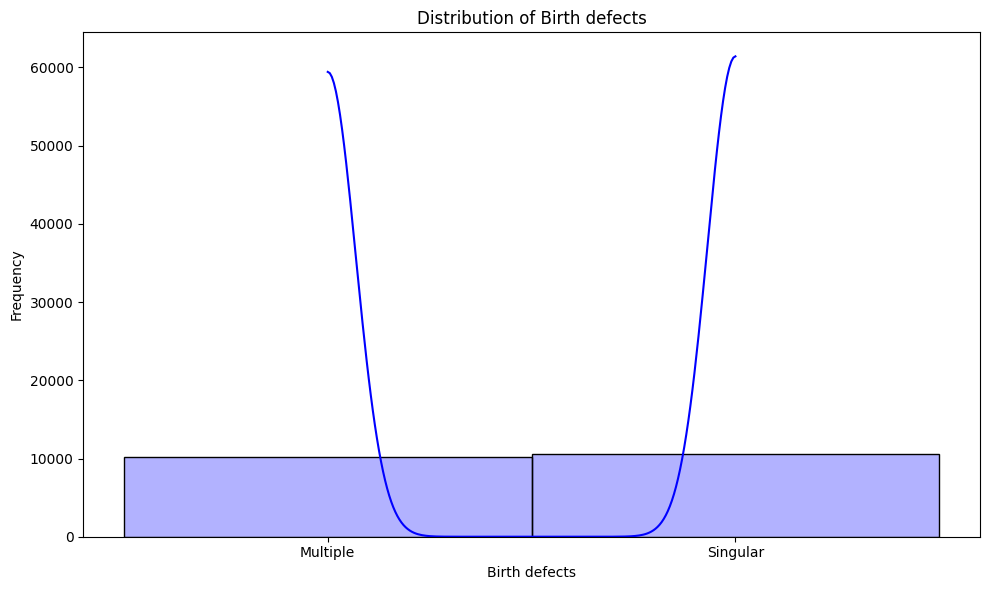

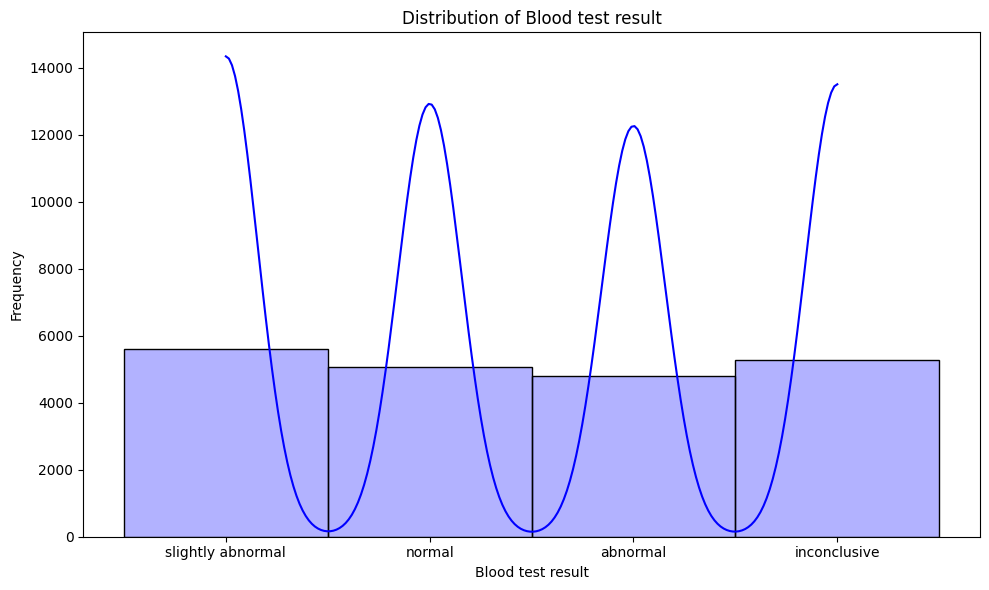

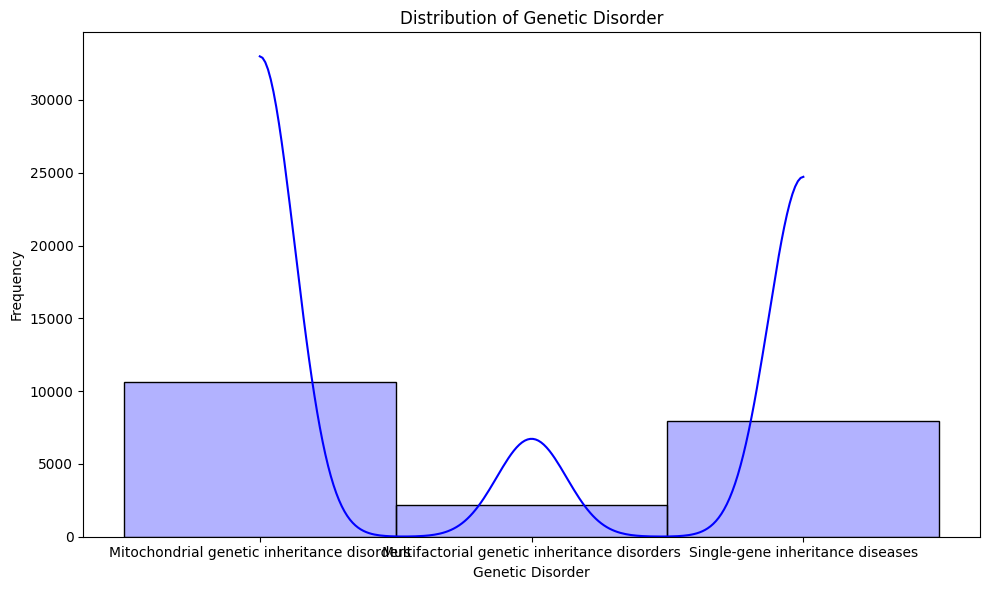

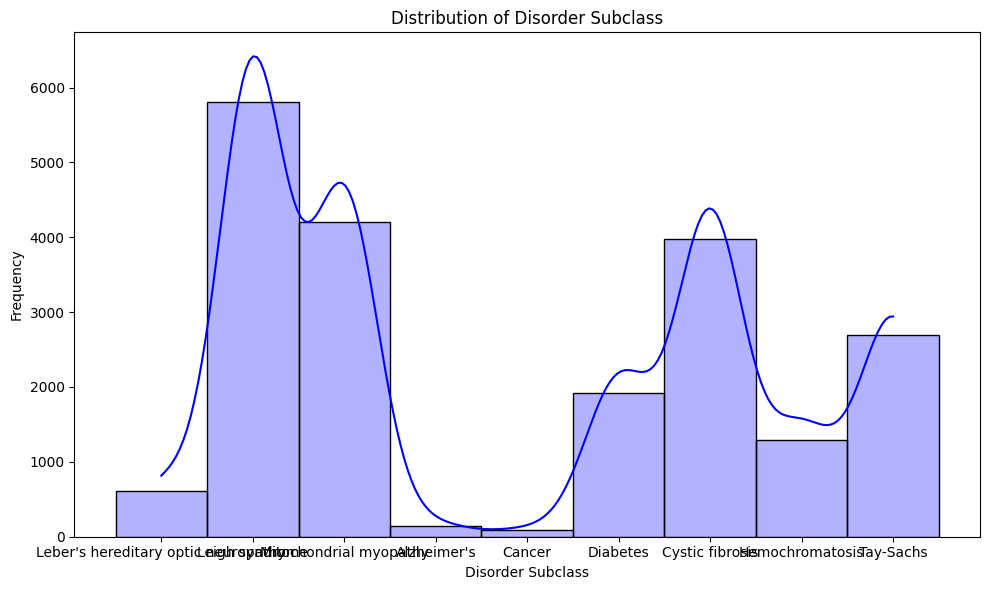

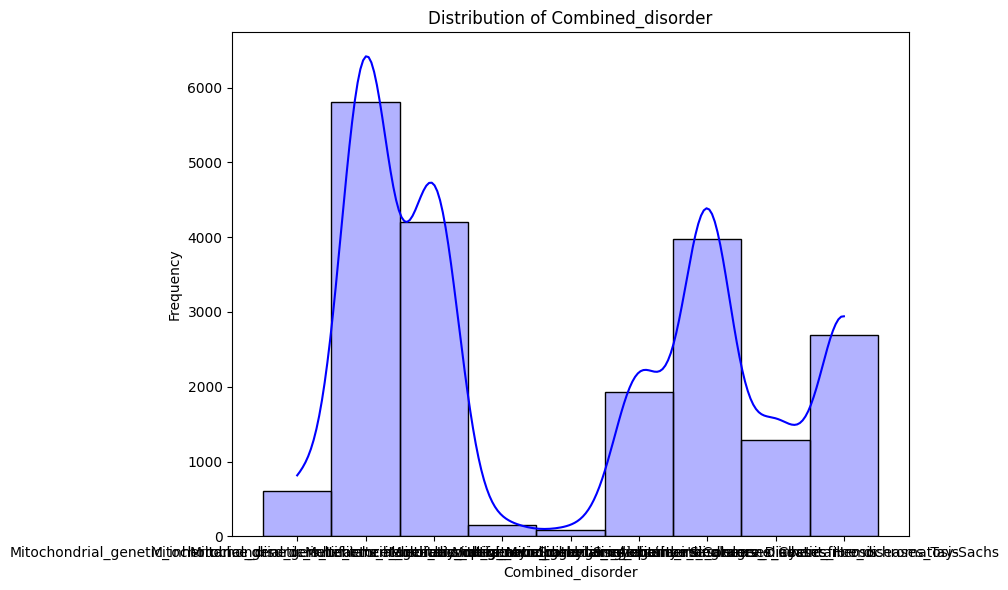

In [18]:
for col in data[categorical_cols]:
    plt.figure(figsize=(10, 6))  # Set figure size for each plot
    #   plt.figure(figsize=(12, 6)) 

    # Plot histogram with KDE
    sns.histplot(data[col], color='b', bins=50, kde=True, alpha=0.3)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Show plot for the current column
    plt.show()

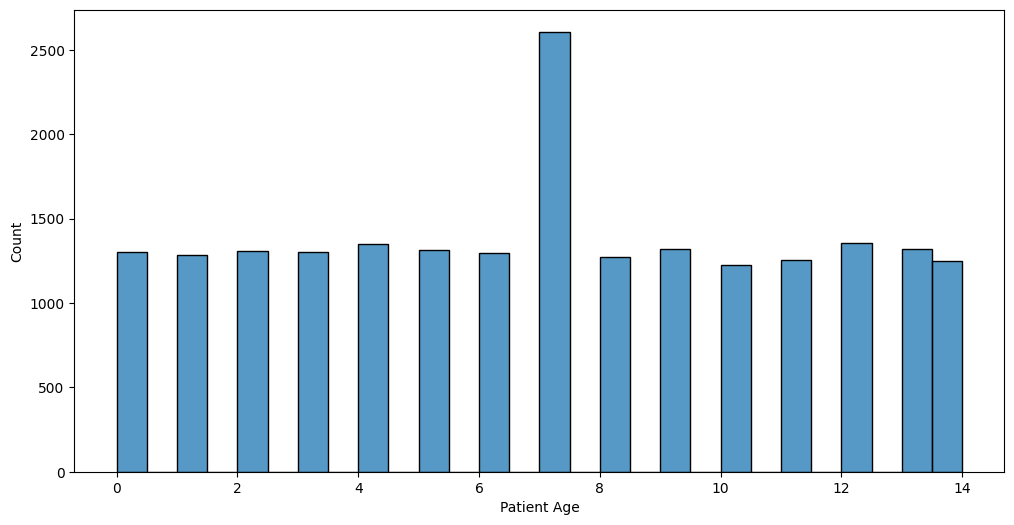

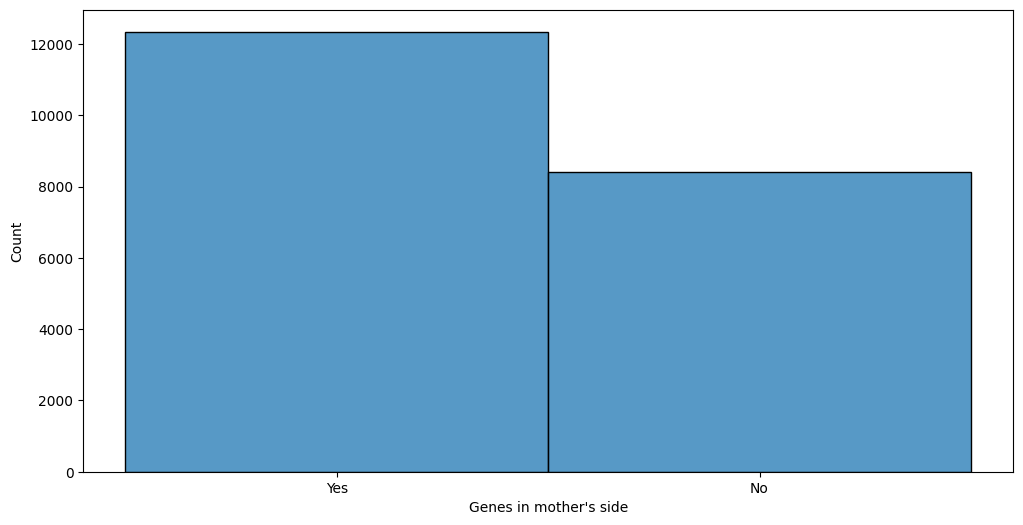

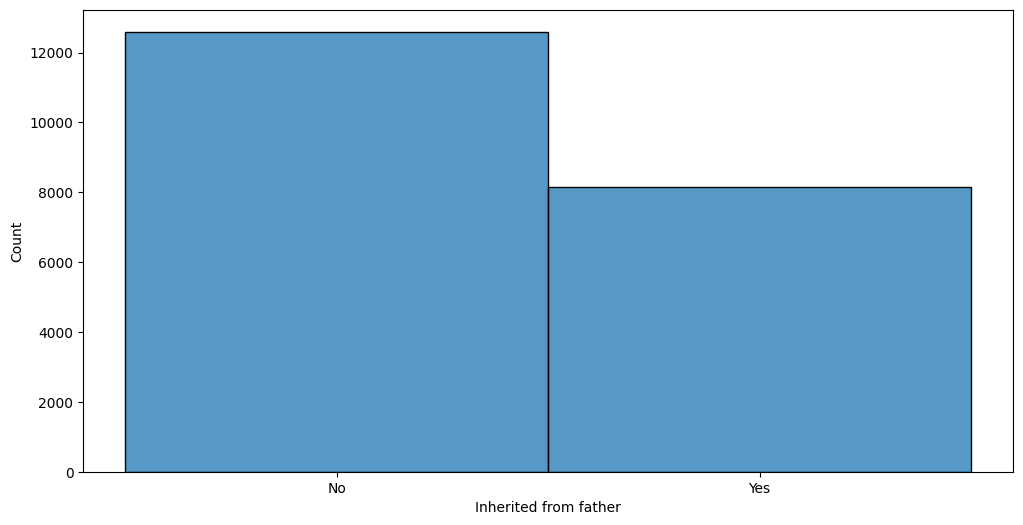

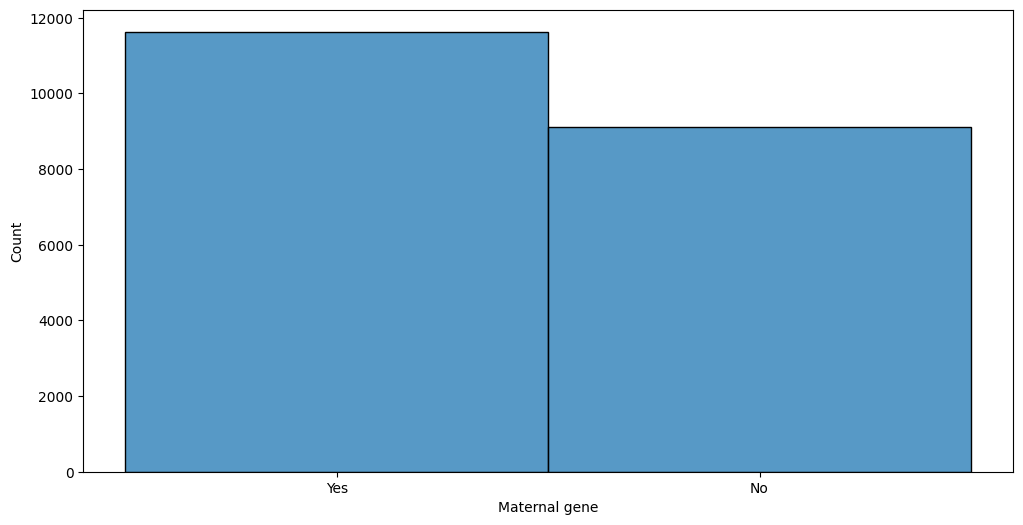

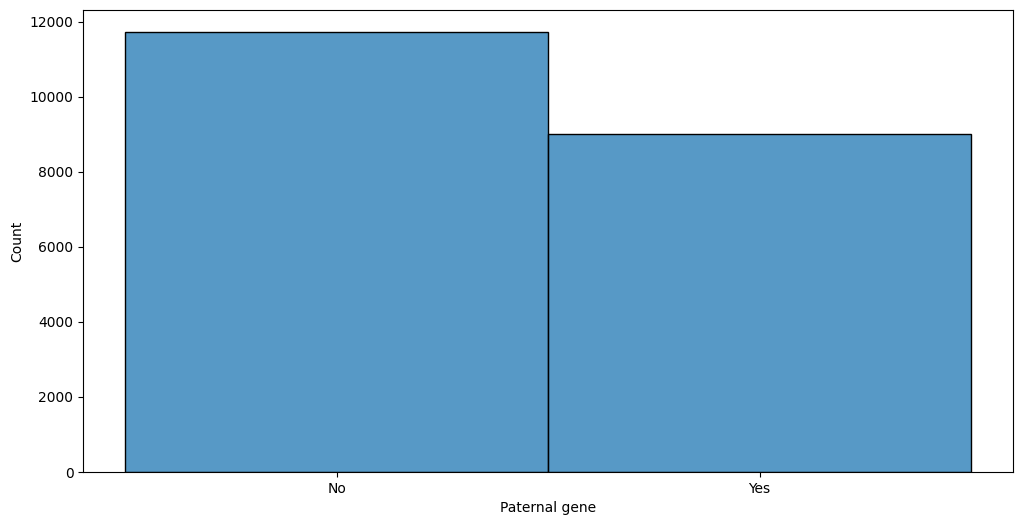

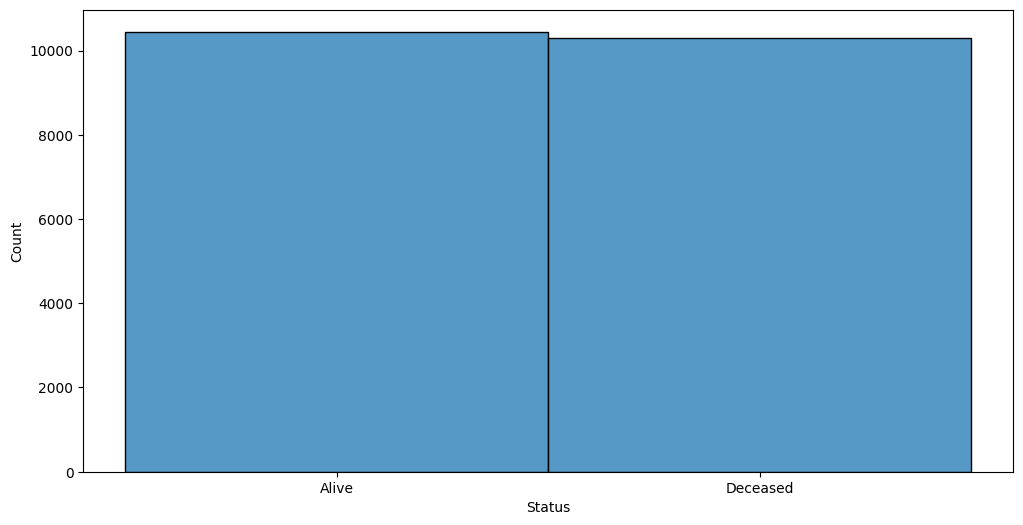

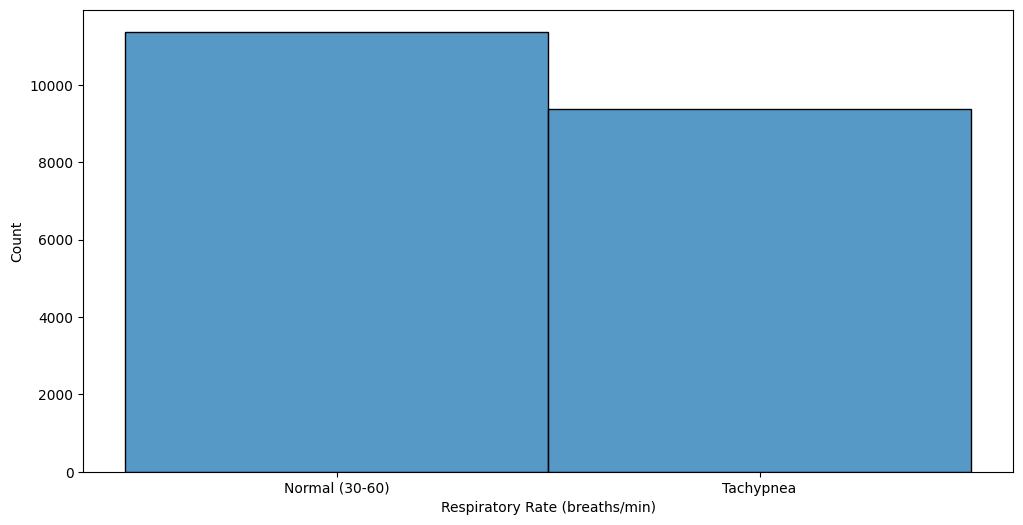

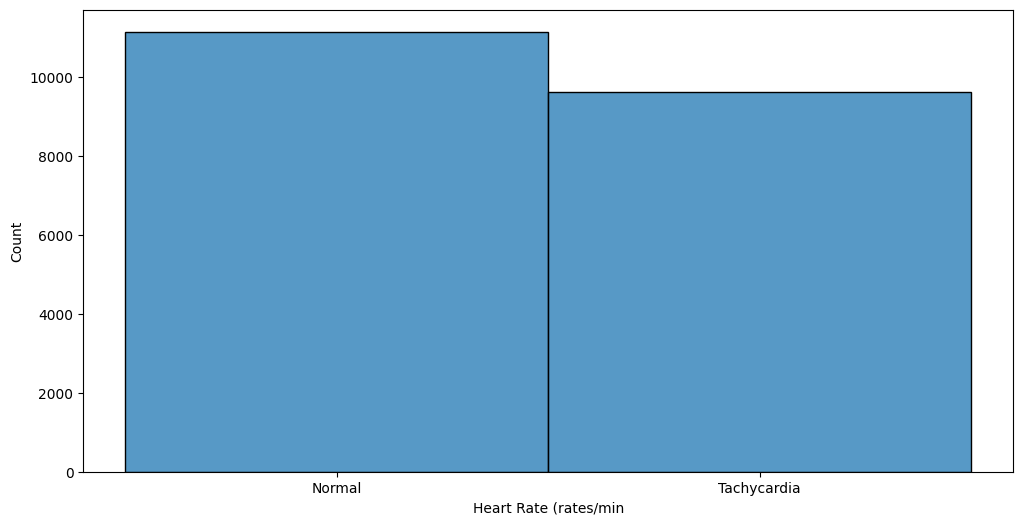

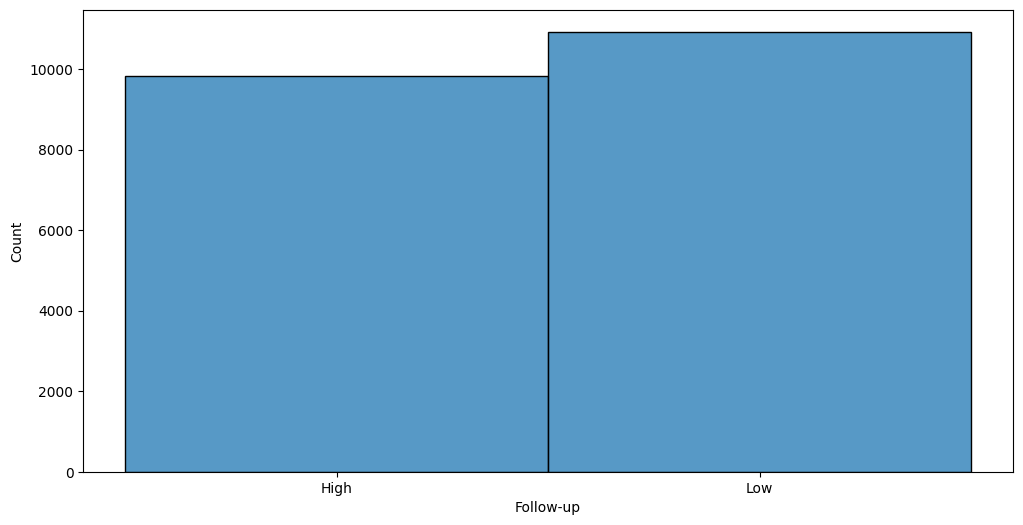

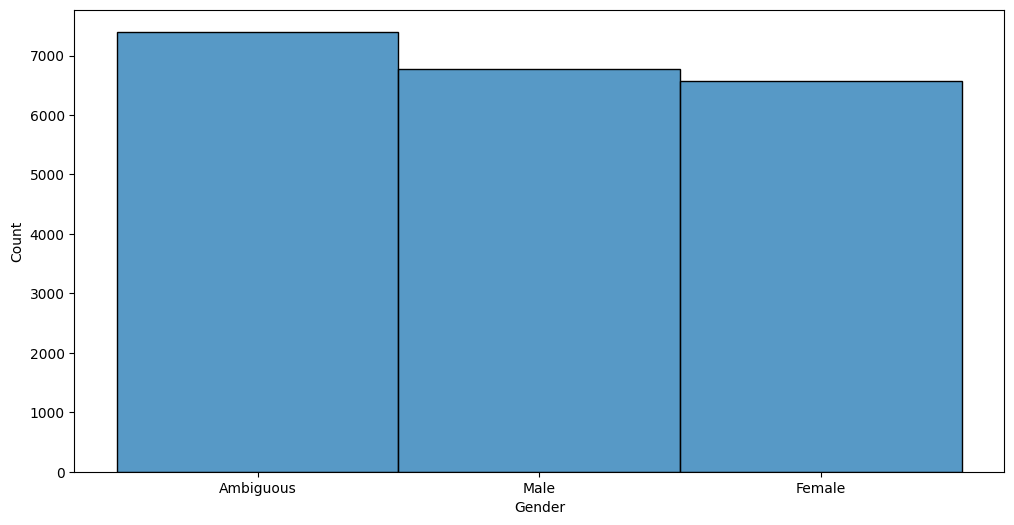

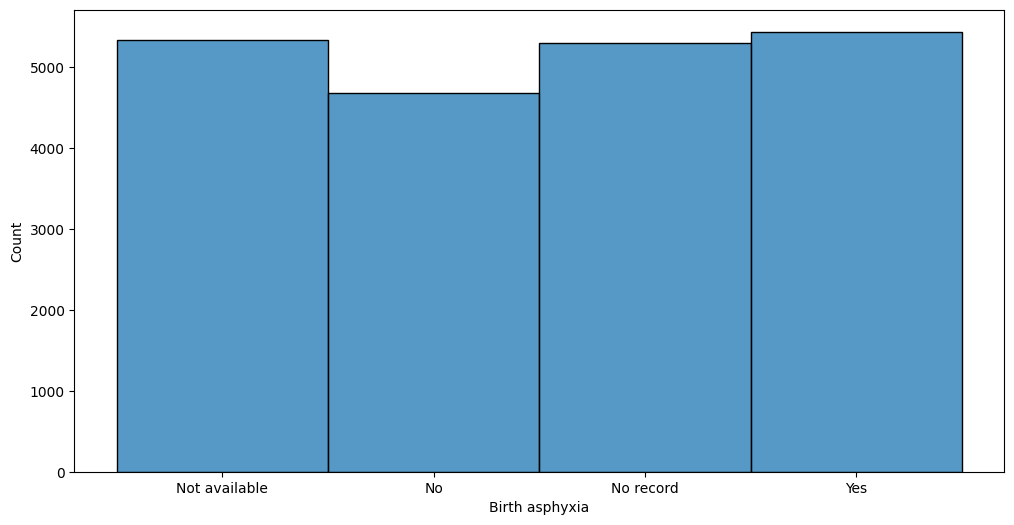

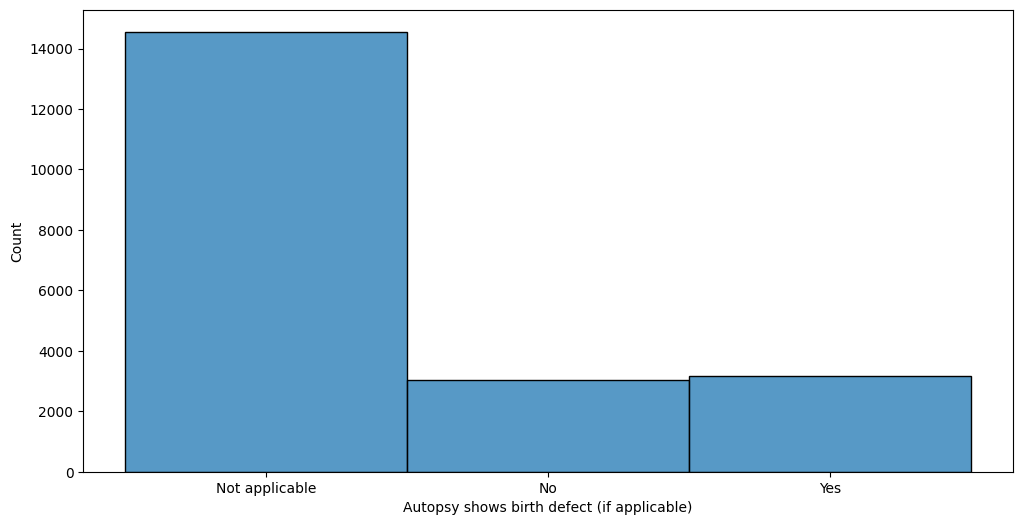

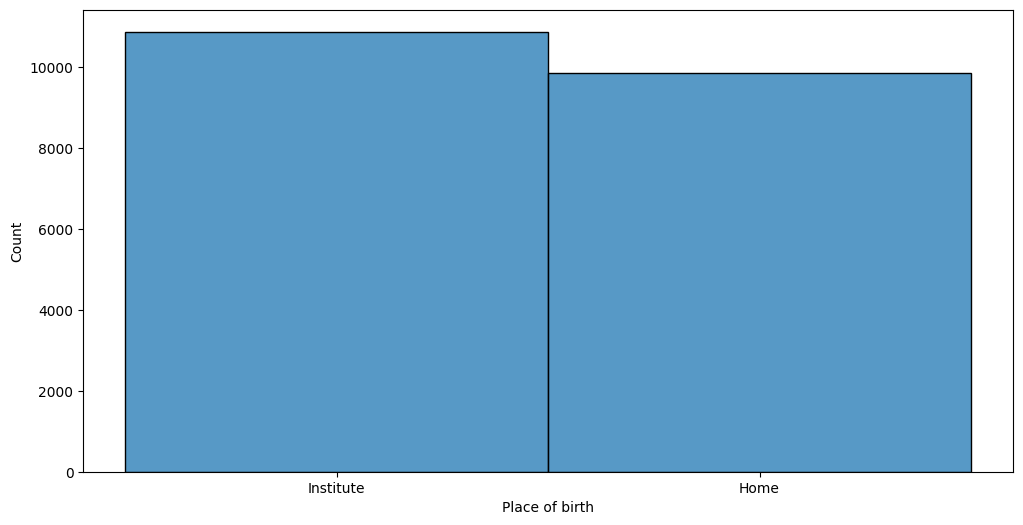

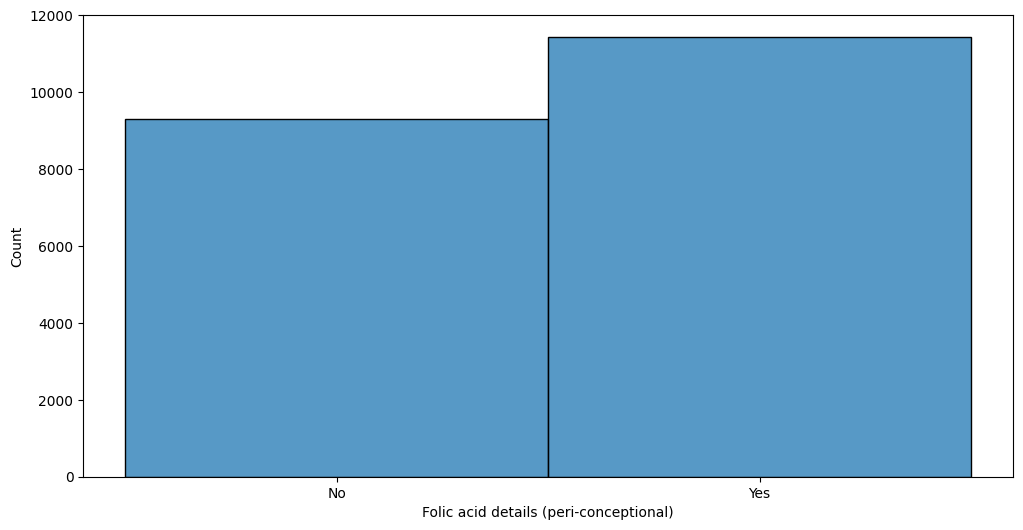

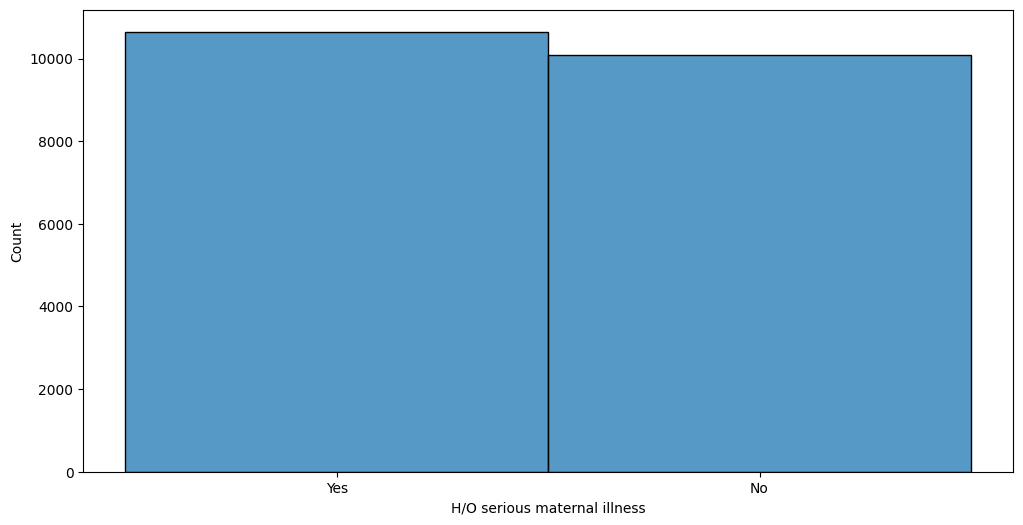

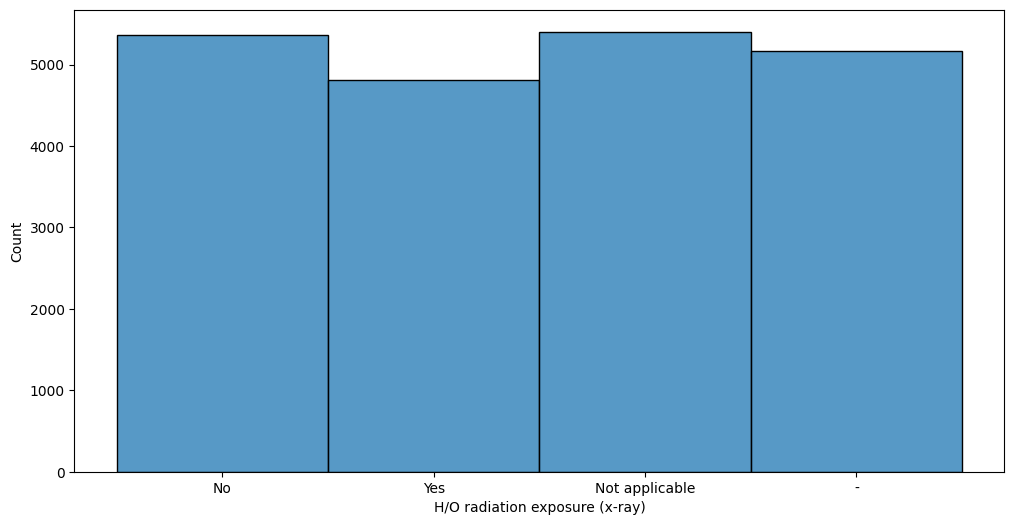

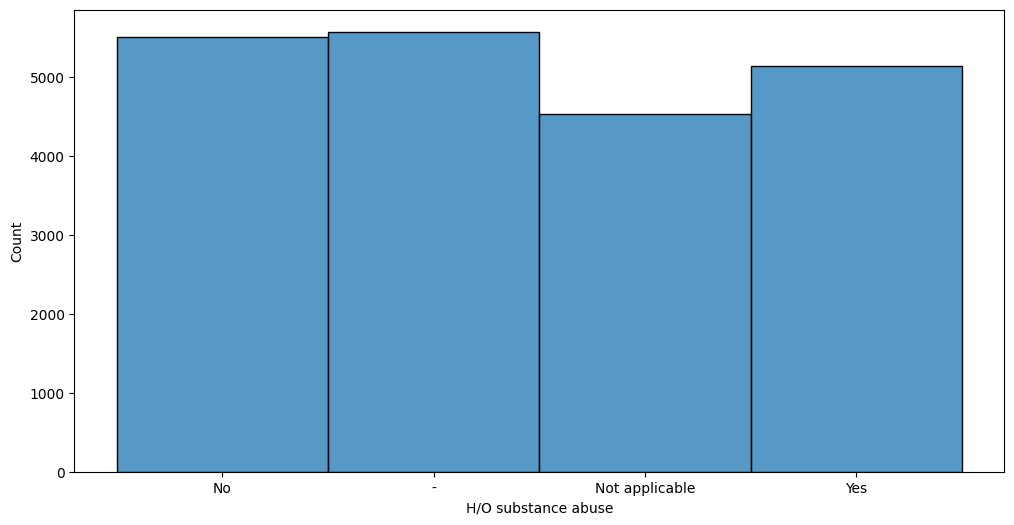

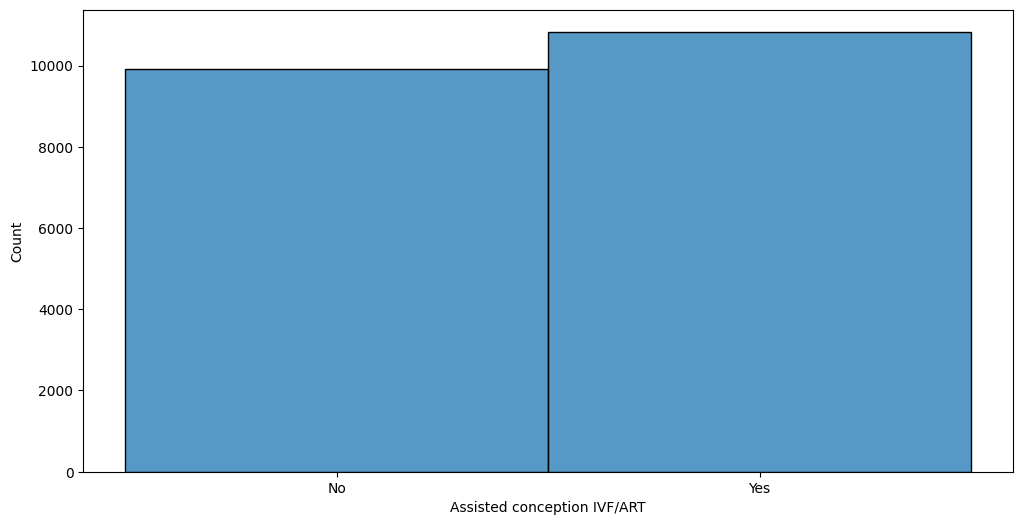

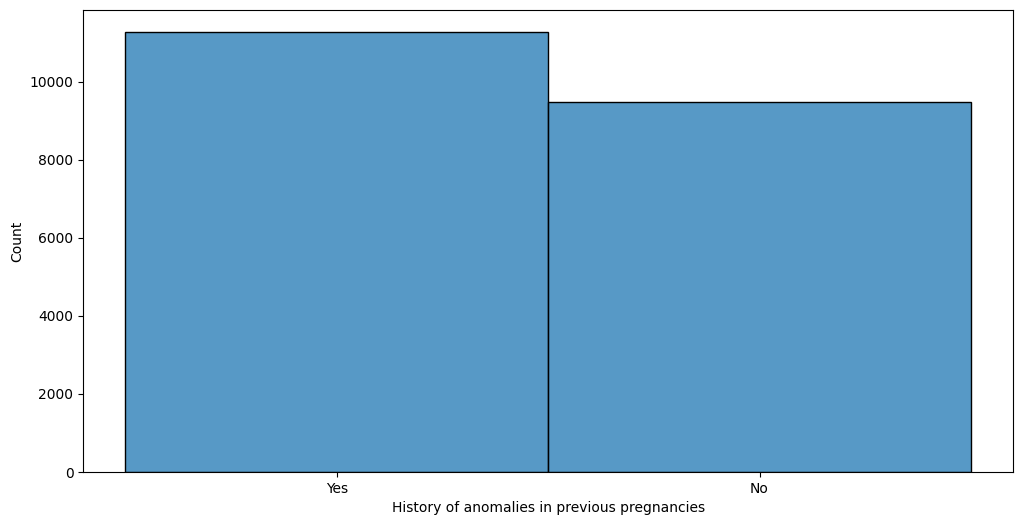

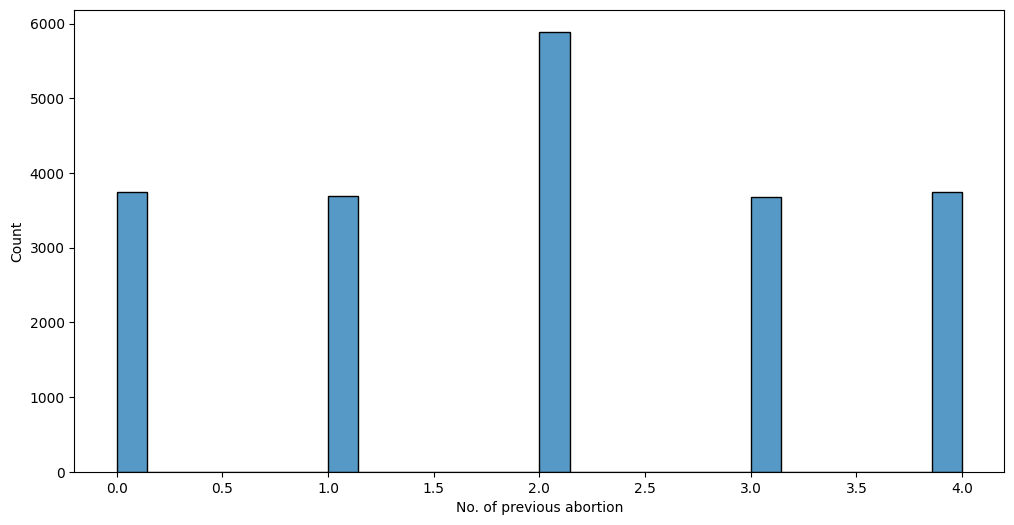

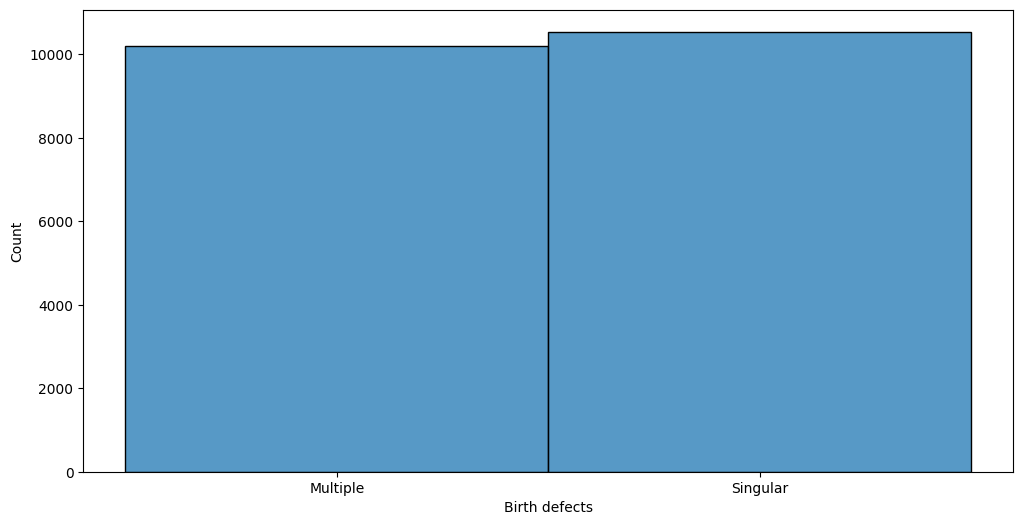

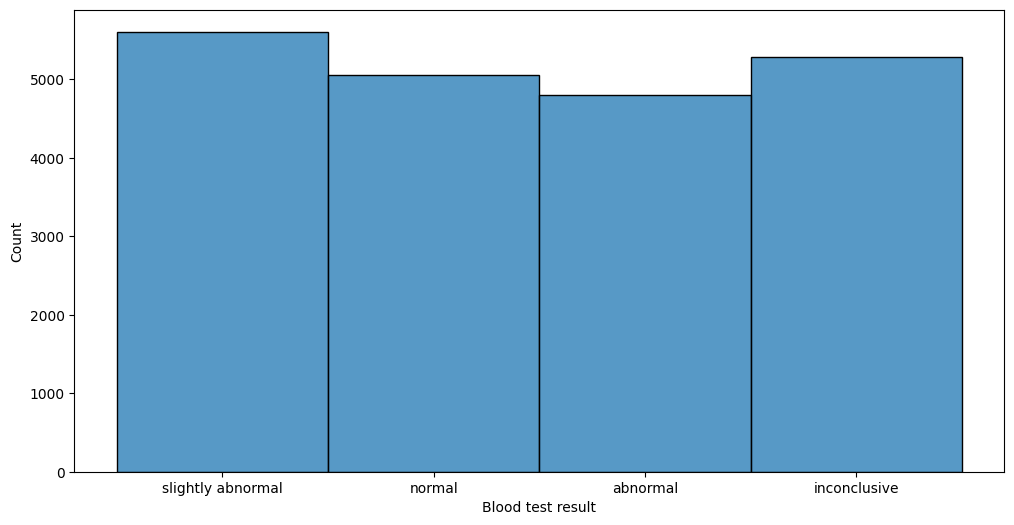

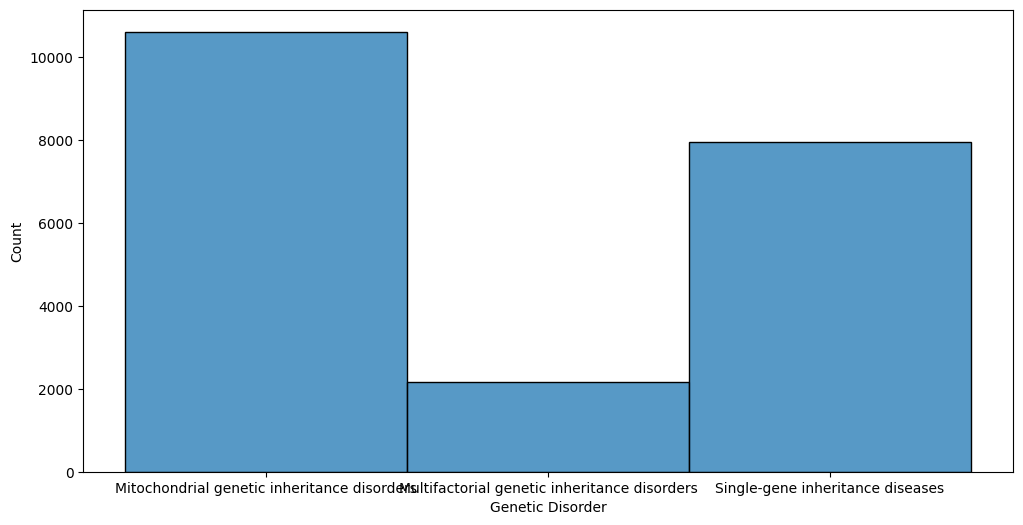

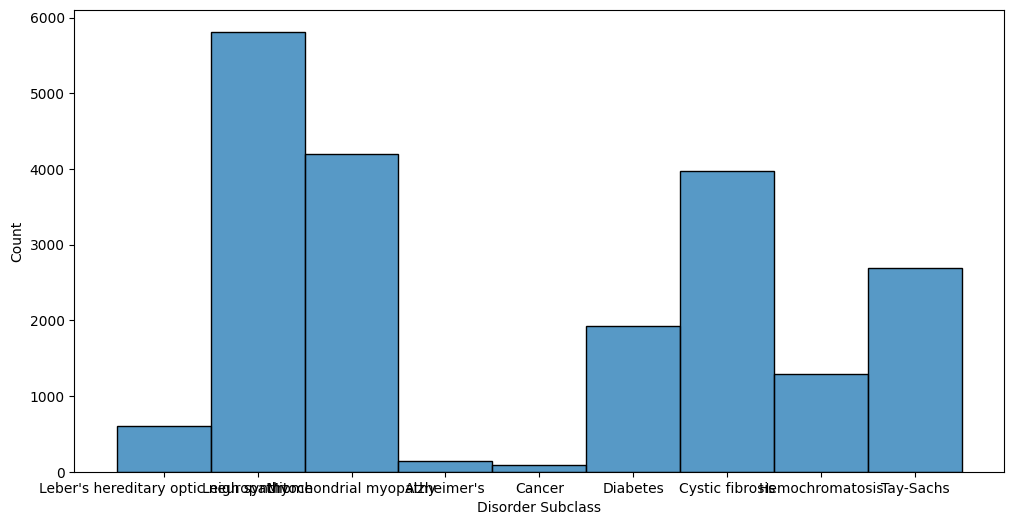

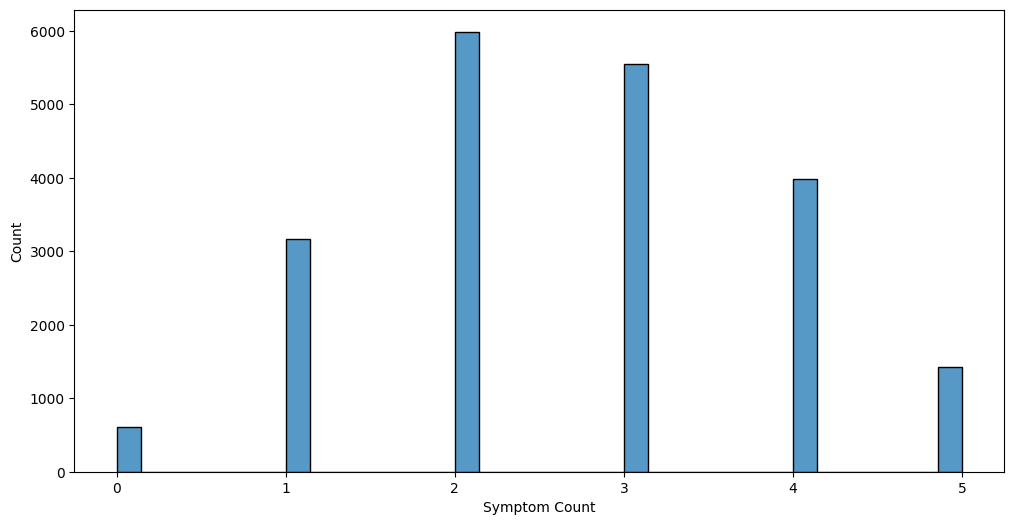

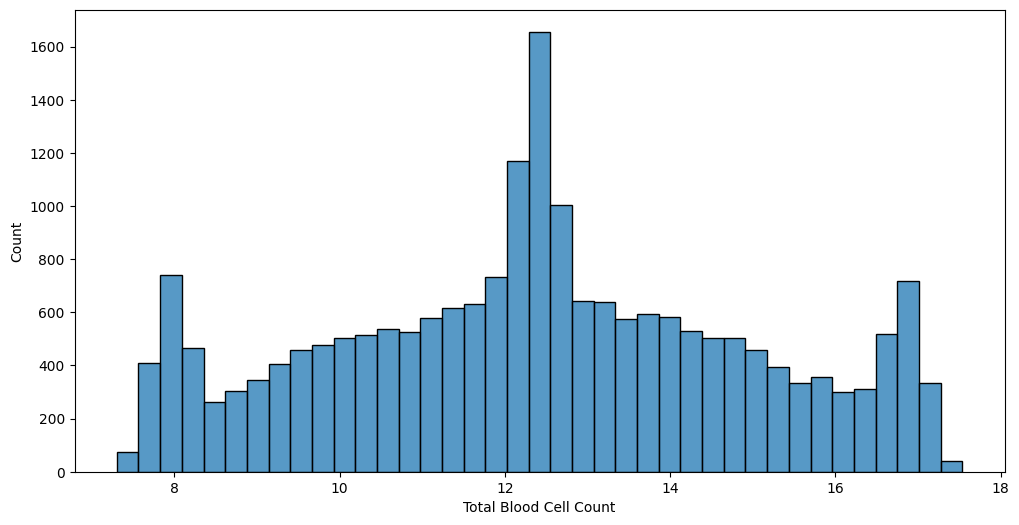

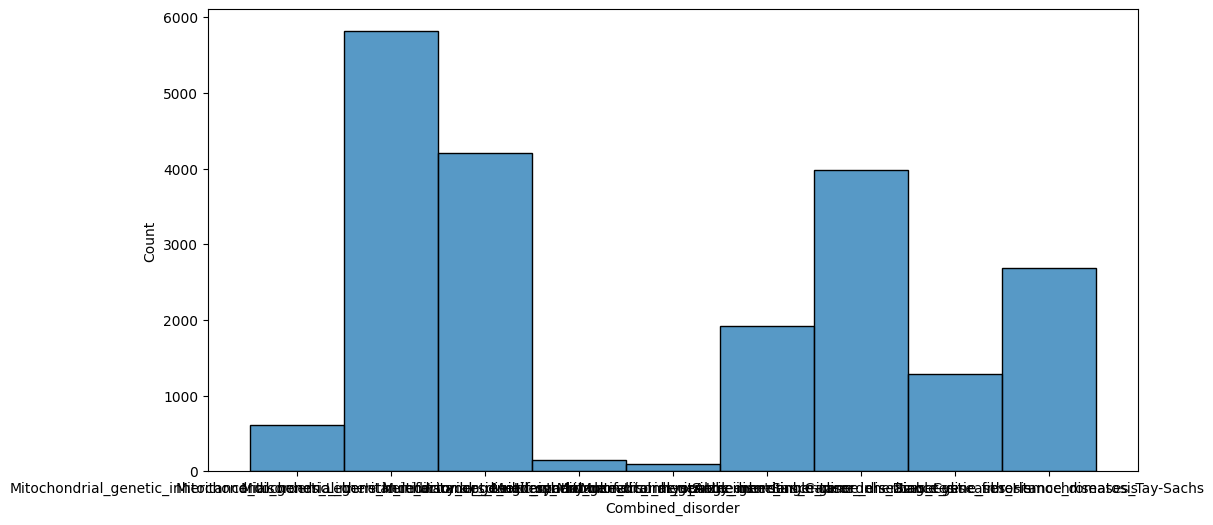

In [19]:
for col in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[col])
    plt.show()

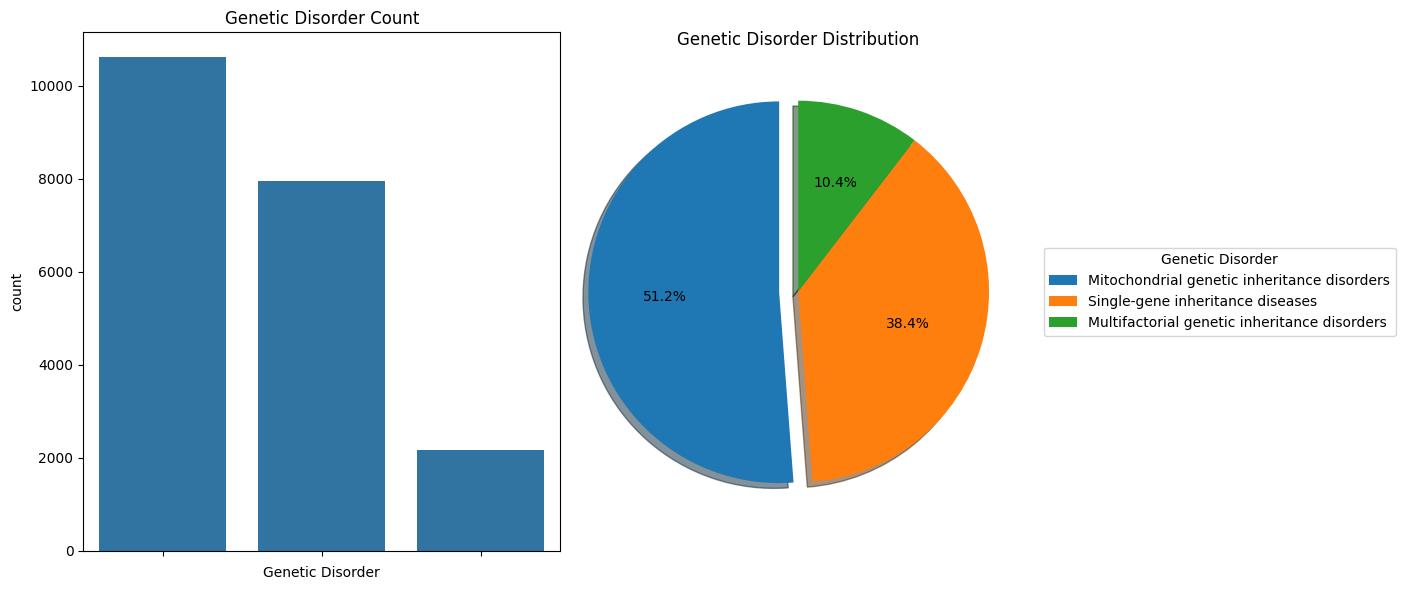

In [20]:
# Define the order based on value_counts() so both plots have the same order
category_order = data['Genetic Disorder'].value_counts().index

# Attrition Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Genetic Disorder (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Genetic Disorder', data=data,  order=category_order)
plt.title('Genetic Disorder Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Genetic Disorder Distribution (now in the same order)
plt.subplot(1, 2, 2)
satisfaction_counts = data['Genetic Disorder'].value_counts()
plt.pie(satisfaction_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0), shadow=True,)
plt.title('Genetic Disorder Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Genetic Disorder")

plt.tight_layout()
plt.show()

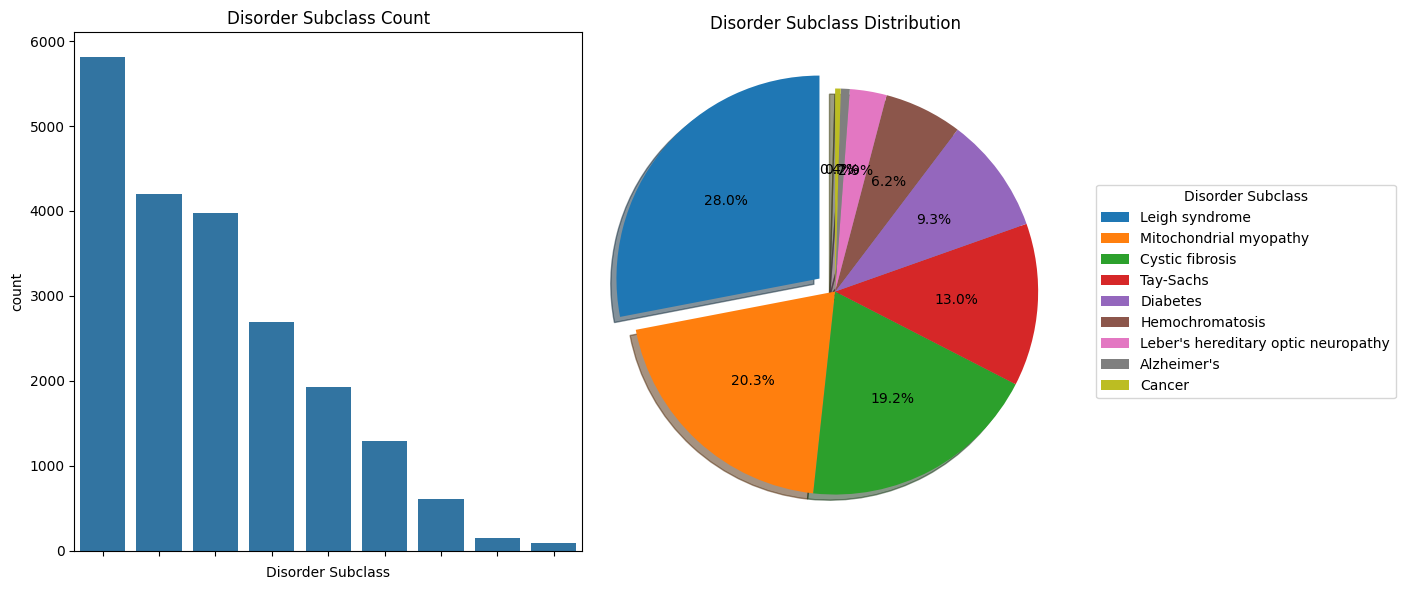

In [21]:

# Define the order based on value_counts() so both plots have the same order
category_order = data['Disorder Subclass'].value_counts().index

# Plot Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Disorder Subclass (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Disorder Subclass', data=data, order=category_order)
plt.title('Disorder Subclass Count')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Disorder Subclass Distribution (with the same order)
plt.subplot(1, 2, 2)
disorder_counts = data['Disorder Subclass'].value_counts()
plt.pie(disorder_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True)
plt.title('Disorder Subclass Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Disorder Subclass")

plt.tight_layout()
plt.show()

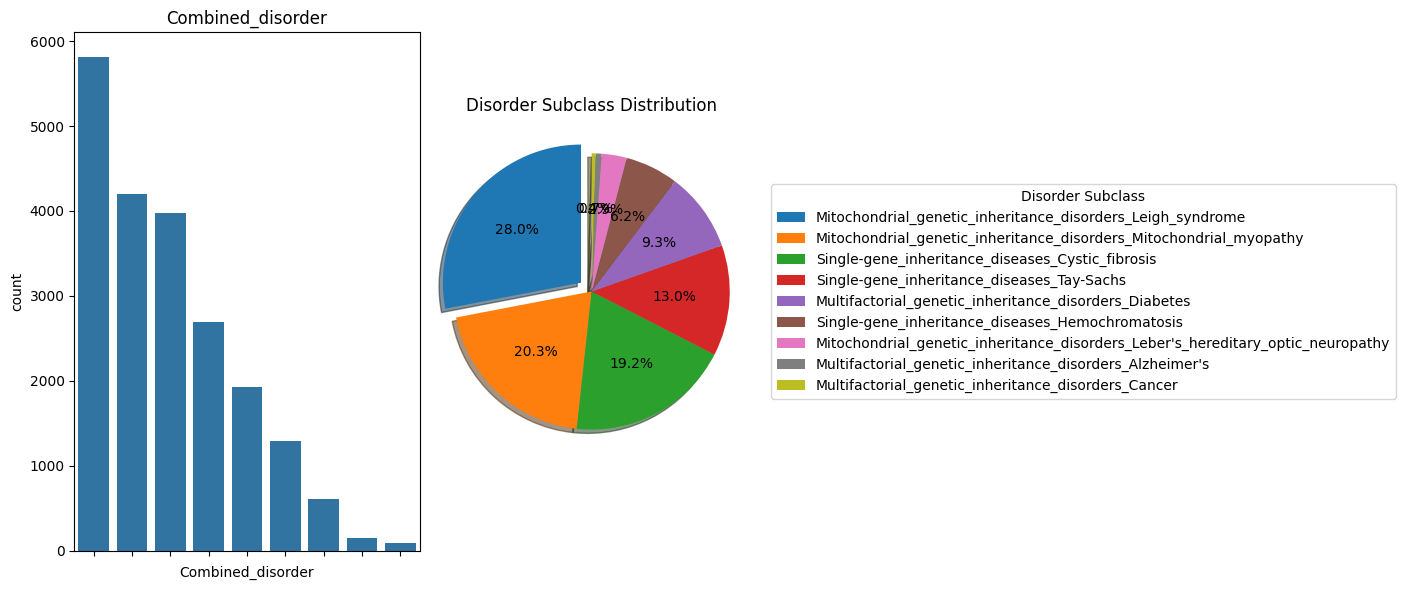

In [22]:
# Define the order based on value_counts() so both plots have the same order
category_order = data['Combined_disorder'].value_counts().index

# Plot Distribution
plt.figure(figsize=(14, 6))

# Count Plot of Disorder Subclass (with explicit order)
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Combined_disorder', data=data, order=category_order)
plt.title('Combined_disorder')

# Remove x-axis labels from count plot
ax.set_xticklabels([])

# Pie Chart of Disorder Subclass Distribution (with the same order)
plt.subplot(1, 2, 2)
disorder_counts = data['Combined_disorder'].value_counts()
plt.pie(disorder_counts, labels=None, autopct='%1.1f%%',
        startangle=90, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), shadow=True)
plt.title('Disorder Subclass Distribution')

# Add legend outside the pie chart (right side, centered)
plt.legend(labels=category_order, loc='center left', bbox_to_anchor=(1, 0.5), title="Disorder Subclass")

plt.tight_layout()
plt.show()

In [23]:
numerical_cols = data.select_dtypes(include=["number"]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
numerical_cols = data.select_dtypes(include=["number"]).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20745 entries, 0 to 20744
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Patient Age                                   20745 non-null  float64
 1   Genes in mother's side                        20745 non-null  int64  
 2   Inherited from father                         20745 non-null  int64  
 3   Maternal gene                                 20745 non-null  int64  
 4   Paternal gene                                 20745 non-null  int64  
 5   Status                                        20745 non-null  int64  
 6   Respiratory Rate (breaths/min)                20745 non-null  int64  
 7   Heart Rate (rates/min                         20745 non-null  int64  
 8   Follow-up                                     20745 non-null  int64  
 9   Gender                                        20745 non-null 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(['Genetic Disorder','Disorder Subclass','Combined_disorder'],axis=1)
y = data[['Genetic Disorder','Disorder Subclass','Combined_disorder']] 
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,random_state=1942
)
scaler = StandardScaler().fit(X_train)
X_train_sdscaler = scaler.transform(X_train)
X_test_sdscaler = scaler.transform(X_test)

In [27]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# -----------------------------
# 1. Definir todos los hiperparámetros posibles
# -----------------------------
param_grid_raw = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'l1_ratio': [None, 0.1, 0.5, 0.9],
}

# -----------------------------
# 2. Filtrar combinaciones válidas
# -----------------------------
valid_combinations = []
for params in ParameterGrid(param_grid_raw):
    penalty = params['penalty']
    solver = params['solver']
    l1_ratio = params['l1_ratio']
    
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        continue
    if penalty == 'elasticnet' and solver != 'saga':
        continue
    if penalty == 'none' and solver not in ['lbfgs', 'saga', 'newton-cg']:
        continue
    if penalty == 'l2' and solver not in ['liblinear', 'lbfgs', 'saga', 'newton-cg']:
        continue
    if penalty != 'elasticnet' and l1_ratio is not None:
        continue
    if penalty == 'elasticnet' and (solver != 'saga' or l1_ratio is None):
        continue

    valid_combinations.append(params)

# -----------------------------
# 3. Entrenar y evaluar para cada objetivo
# -----------------------------
resultados = []




for objetivo in ['Genetic Disorder', 'Disorder Subclass', 'Combined_disorder']:
    print(f"\n Procesando objetivo: {objetivo}")

    mejor_score = -1
    mejor_params = None
    mejor_modelo = None

    # Búsqueda manual de la mejor combinación
    for params in valid_combinations:
        try:
            model = LogisticRegression(**params, max_iter=1000)

            # ↓↓↓ Aplicar LDA aquí con los datos de entrenamiento
            n_classes = y_train[objetivo].nunique()
            n_components = min(n_classes - 1, X_train.shape[1])
            lda = LinearDiscriminantAnalysis(n_components=n_components)
            X_train_lda = lda.fit_transform(X_train_sdscaler, y_train[objetivo])

            model.fit(X_train_lda, y_train[objetivo])
            score = model.score(X_train_lda, y_train[objetivo])

            if score > mejor_score:
                mejor_score = score
                mejor_params = params
                mejor_modelo = model
                mejor_lda = lda  # ← Guardamos el mejor LDA también

        except Exception as e:
            continue

    # Medir tiempo incluyendo LDA + modelo
    start_time = time.time()
    X_train_lda = mejor_lda.fit_transform(X_train_sdscaler, y_train[objetivo])
    X_test_lda = mejor_lda.transform(X_test_sdscaler)
    mejor_modelo.fit(X_train_lda, y_train[objetivo])
    end_time = time.time()
    
    training_time = end_time - start_time

    # Predicción y evaluación
    y_pred = mejor_modelo.predict(X_test_lda)

    acc = accuracy_score(y_test[objetivo], y_pred)
    prec = precision_score(y_test[objetivo], y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test[objetivo], y_pred, average='weighted')
    f1 = f1_score(y_test[objetivo], y_pred, average='weighted')

    resultados.append({
        'Objetivo': objetivo,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'Tiempo entrenamiento (s)': training_time,
        'Mejores parámetros': mejor_params
    })


 Procesando objetivo: Genetic Disorder


C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is d


 Procesando objetivo: Disorder Subclass


C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is d


 Procesando objetivo: Combined_disorder


C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is d

In [28]:
# -----------------------------
# 4. Guardar y mostrar resultados
# -----------------------------
df_resultados = pd.DataFrame(resultados)

print("\n Resultados resumidos:")
print(df_resultados)

# Exportar si se desea
df_resultados.to_csv("resultados_logistic_regression_with_LDA.csv", index=False)


 Resultados resumidos:
            Objetivo  Accuracy  Precision    Recall  F1-score  \
0   Genetic Disorder  0.550253   0.544055  0.550253  0.518772   
1  Disorder Subclass  0.495300   0.495926  0.495300  0.487929   
2  Combined_disorder  0.495300   0.495926  0.495300  0.487929   

   Tiempo entrenamiento (s)                                 Mejores parámetros  
0                  0.075708  {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasti...  
1                  1.393781  {'C': 10, 'l1_ratio': None, 'penalty': 'l1', '...  
2                  1.471926  {'C': 10, 'l1_ratio': None, 'penalty': 'l1', '...  
